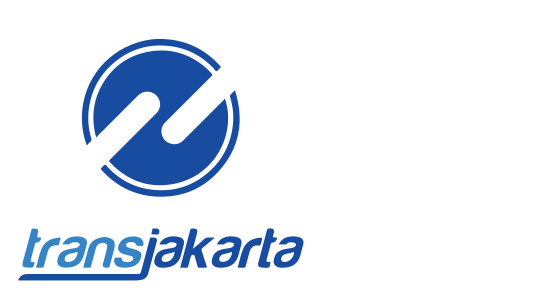
# Latar Belakang
***
Transjakarta adalah perusahaan BUMD (Badan Usaha Milik Daerah) khusus yang dibentuk oleh Pemprov DKI Jakarta untuk mengelola transportasi publik Jakarta. Perusahaan ini mengoperasikan Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan, yang didesain berdasarkan sistem TransMilenio di Bogota, Kolombia. Dengan jalur lintasan terpanjang di dunia (208 km), Transjakarta terus menjadi tulang punggung transportasi massal di Jakarta.


### Sejarah Singkat
Didirikan pada tahun 2004, Transjakarta lahir sebagai solusi untuk mengurangi kemacetan, polusi, dan ketergantungan pada kendaraan pribadi di Jakarta. Sistem busway ini awalnya hanya memiliki satu koridor, tetapi kini berkembang hingga memiliki lebih dari 13 koridor utama dan layanan pendukung lainnya yang terus diperluas untuk memenuhi kebutuhan mobilitas masyarakat.

### *Stakeholders*
Transjakarta melibatkan berbagai pemangku kepentingan, termasuk:
- Pemerintah Provinsi DKI Jakarta sebagai pemegang saham tertinggi.
- **Masyarakat DKI dan pengguna Transjakarta**.
- Mitra operator bus dan penyedia layanan pendukung.
- Karyawan dan tenaga kerja Transjakarta.

### Visi dan Misi
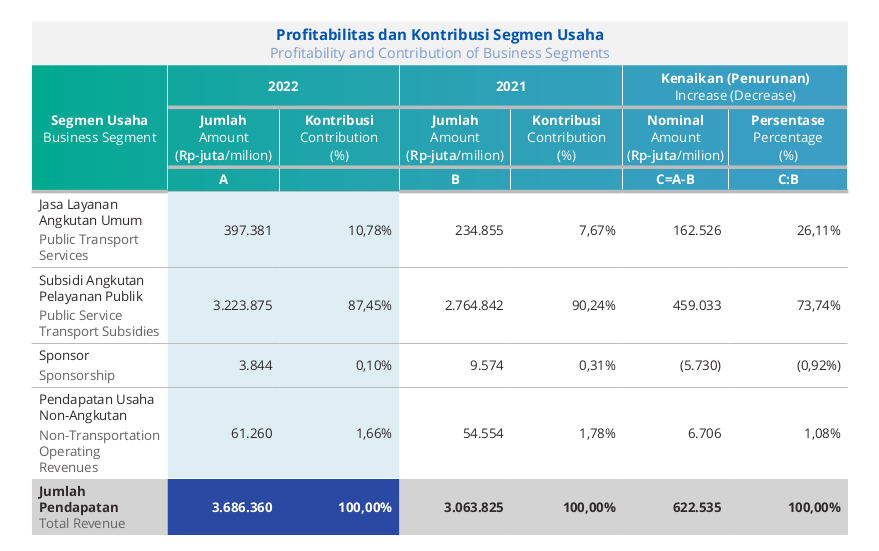

Sebagai perusahaan transportasi milik daerah, tujuan utama Transjakarta bukanlah profit, namun untuk **menyediakan layanan transportasi yang nyaman dan terjangkau demi mengurangi kemacetan dan polusi di Jakarta**. Ini tercermin pada data keuangan Transjakarta pada data tahun 2022:
- **Mayoritas pendapatan Transjakarta (87,45%) berasal dari subsidi angkutan pelayanan publik** sebesar Rp3,223 triliun. 
- Pendapatan dari layanan transportasi umum hanya memberikan kontribusi 10,78% atau Rp397 miliar.
- Komponen lain, seperti sponsor dan pendapatan usaha non-angkutan, berkontribusi sangat kecil terhadap total pendapatan.

Sebagai pembayar pajak yang mendukung pendanaan pemerintah, masyarakat berhak mendapatkan layanan transportasi publik yang memadai. Oleh karena itu, Transjakarta memprioritaskan kenyamanan dan aksesibilitas bagi masyarakat, dengan memanfaatkan dana publik untuk memberikan manfaat sosial yang maksimal melalui transportasi yang nyaman dan efisien. Tentu saja ini bukan berarti Transjakarta mengabaikan profit dan rugi sepenuhnya, karena perusahaan juga bertanggung jawab untuk membayar biaya operasi dan pekerja. Kebijakan transportasi publik sering kali dipengaruhi oleh keputusan pemerintah daerah dan kebijakan anggaran yang bisa berubah drastis suatu waktu, sehingga tetap juga perlu memikirkan profit meskipun tidak seperti perusahaan konvensional.


Sumber: Laporan Tahunan PT Transportasi Jakarta Tahun 2022

### Rumusan Masalah

Analisis ini akan berfokus pada data transaksi bulan April 2023 dengan tujuan meningkatkan kualitas pelayanan dan memahami pola penggunaan Transjakarta. Dataset yang tersedia mencakup informasi detail tentang transaksi penumpang, termasuk waktu perjalanan, rute yang digunakan, serta profil demografis pengguna.

Beberapa fokus utama dalam analisis ini adalah adalah sebagai berikut:

1. **Bagaimana demografi pengguna Transjakarta?**

2. **Bagaimana pola perjalanan pengguna menggunakan Transjakarta pada kondisi tertentu?**

3. **Apa Layanan Transjakarta yang harus diprioritaskan**?

4. **Apa rekomendasi yang relevan untuk meningkatkan kualitas layanan Transjakarta?**

### Data untuk Analisis

Dataset yang digunakan untuk analisis ini merupakan data transaksi Transjakarta selama bulan April 2023 dengan rincian sebagai berikut:

- `transID`: ID unik untuk setiap transaksi pelanggan.

- `payCardID`: Identitas utama pelanggan berupa nomor kartu yang digunakan untuk akses masuk dan keluar.

- `payCardBank`: Nama penerbit kartu bank pelanggan.

- `payCardName`: Nama pelanggan yang tercantum di kartu.

- `payCardSex`: Jenis kelamin pelanggan yang tercantum di kartu.

- `payCardBirthDate`: Tahun kelahiran pelanggan yang tercantum di kartu.

- `corridorID`: ID koridor/rute yang digunakan untuk mengelompokkan rute.

- `corridorName`: Nama koridor/rute yang mencakup titik awal dan akhir perjalanan.

- `direction`: Arah perjalanan, dengan nilai `0` untuk keberangkatan (*Go*) dan `1` untuk kepulangan (*Back*).

- `tapInStops`: ID halte tempat pelanggan melakukan *tap in* (masuk).

- `tapInStopsName`: Nama halte tempat pelanggan melakukan *tap in* (masuk).

- `tapInStopsLat`: Latitude lokasi halte *tap in*.

- `tapInStopsLon`: Longitude lokasi halte *tap in*.

- `stopStartSeq`: Urutan halte dalam koridor/rute untuk *tap in*.

- `tapInTime`: Waktu pelanggan melakukan *tap in*, mencakup tanggal dan waktu.

- `tapOutStops`: ID halte tempat pelanggan melakukan *tap out* (keluar).

- `tapOutStopsName`: Nama halte tempat pelanggan melakukan *tap out* (keluar).

- `tapOutStopsLat`: Latitude lokasi halte *tap out*.

- `tapOutStopsLon`: Longitude lokasi halte *tap out*.

- `stopEndSeq`: Urutan halte dalam koridor/rute untuk *tap out*.

- `tapOutTime`: Waktu pelanggan melakukan *tap out*, mencakup tanggal dan waktu.

- `payAmount`: Jumlah yang dibayarkan oleh pelanggan untuk perjalanan. Beberapa perjalanan gratis, sementara yang lain berbayar.

# Data Cleaning
***

## Import Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Inspection

In [2]:
df = pd.read_csv('Transjakarta.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [3]:
## For displaying all columns
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [4]:
df['payCardSex'] = df['payCardSex'].map({'M':'Pria', 'F':'Wanita'})
df['payCardID'] = df['payCardID'].astype('str')

In [5]:
print(f"jumlah duplikat: {df.duplicated().sum()}\npersentase duplikat: {(df.duplicated().sum() / df.shape[0] * 100).round(1)}%")

jumlah duplikat: 0
persentase duplikat: 0.0%


In [6]:
print(f"""jumlah baris dengan minimal 1 missing data: {df.isna().any(axis=1).sum()}
persentase baris dengan minimal 1 missing data: {(df.isna().any(axis=1).sum() / df.shape[0] * 100).round(1)}%""")

jumlah baris dengan minimal 1 missing data: 6170
persentase baris dengan minimal 1 missing data: 16.3%


Penghapusan seluruh baris dengan *missing* data berarti menghilangkan 16.3% dari total data. Sebaiknya dilakukan *cleaning* terlebih dahulu untuk data yang bisa dilakukan imputasi.

In [7]:
def highlight_rows(row,indexes):
    # Self explanatory
    return ['background-color: yellow' if row.name in indexes else '' for _ in row]

def highlight_cols(col,indexes):
    # Self explanatory
    return ['background-color: #9FFFFF' if col.name in indexes else '' for _ in col]

def highlight_cells(data, row_indexes, column_names):
    return np.where((data.index.isin(row_indexes)) & (data.name in column_names), 'background-color: yellow', '')

In [8]:
def null_unique_summary(data, original_data_size):
    ## For summarizing NULLs, uniques, and data loss
    return pd.DataFrame({
    'original_data_size': original_data_size,
    'null_count': data.isna().sum(),
    'null_pct': (data.isna().sum() / original_data_size * 100).round(2),
    'unique_count': data.nunique(),
    'current_data_size': data.shape[0],
    'pct_loss':  np.round((1 - data.shape[0]/ original_data_size) * 100, 2)
}).rename_axis('column')

In [9]:
original_data_size = df.shape[0]

In [10]:
null_unique_summary(df, original_data_size)\
    .style\
    .apply(highlight_rows, indexes=['transID', 'corridorID', 'corridorName'], axis=1)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37900,37900,0.000000
payCardID,37900,0,0.000000,2000,37900,0.000000
payCardBank,37900,0,0.000000,6,37900,0.000000
payCardName,37900,0,0.000000,1993,37900,0.000000
payCardSex,37900,0,0.000000,2,37900,0.000000
payCardBirthDate,37900,0,0.000000,67,37900,0.000000
corridorID,37900,1257,3.320000,221,37900,0.000000
corridorName,37900,1930,5.090000,216,37900,0.000000
direction,37900,0,0.000000,2,37900,0.000000


Dari hasil di atas dapat dilihat bahwa kolom yang memiliki data kosong cukup banyak. `trainsID` 100% unik. `corridorID` dan `corridorName` memiliki persen NULL  yang relatif banyak.

# Cleaning & EDA

## Cleaning `CorridorID` & `CorridorName`

Jika mengacu pada definisi kolom-kolom data di awal, `corridorID` yang NULL seharusnya dapat ditentukan dari kombinasi halte awal, halte akhir, urutan halte, dan arah perjalanan, karena variabel-variabel tersebut biasanya dapat mendefinisikan sebuah rute dengan spesifik.

In [11]:
df_route_to_corridorid = df.groupby(['tapInStopsName','tapOutStopsName', 'stopStartSeq', 'stopEndSeq', 'direction'])['corridorID']\
    .apply(lambda x: x.dropna().unique())\
    .reset_index()\
    .set_index(['tapInStopsName','tapOutStopsName', 'stopStartSeq', 'stopEndSeq', 'direction'])
df_route_to_corridorid['n_corridorID'] = df_route_to_corridorid['corridorID'].str.len()
df_route_to_corridorid

,,,,,corridorID,n_corridorID
tapInStopsName,tapOutStopsName,stopStartSeq,stopEndSeq,direction,,
18 Office Park,Gg. Puskesmas Kebagusan Raya,19,21.0,1.0,[JAK.46],1
ACC Simatupang,Taman Lenteng Agung,20,30.0,1.0,[D21],1
ACE Hardware,Term. Depok Baru,9,12.0,1.0,[D11],1
AKR Tower,MNC Studios,32,33.0,0.0,[JAK.30],1
ASEAN,Kejaksaan Agung,30,31.0,0.0,[S21],1
...,...,...,...,...,...,...
Yayasan Muhammadiyah 2,Rusun Tanah Abang 2,23,25.0,0.0,[5F],1
Yayasan Nurul Ihsan Pulo Gebang,Jln. Permata Indah 8,4,41.0,1.0,[JAK.40],1
Yayasan Perguruan Rakyat 2,STIE Trianandra,21,22.0,1.0,[JAK.74],1


In [12]:
df_route_to_corridorid.query("n_corridorID > 1").sort_values('n_corridorID',ascending=False)

,,,,,corridorID,n_corridorID
tapInStopsName,tapOutStopsName,stopStartSeq,stopEndSeq,direction,,
Adam Malik,Puri Beta 2,10,11.0,1.0,"[L13E, M13]",2
Menara Duta,Setiabudi Utara 2,14,15.0,0.0,"[B14, D31]",2
Swadarma,Seskoal,4,6.0,0.0,"[13B, 13]",2
Sbr. MNC Center,St. Gondangdia 2,10,11.0,1.0,"[M1H, 1H]",2
STIP 2,Kebantenan,3,5.0,0.0,"[12F, 10A]",2
Rawa Selatan,Galur,9,10.0,0.0,"[2, M2]",2
Puri Beta 2,Rawa Barat,0,11.0,0.0,"[M13, 13C]",2
Pulo Mas,Cempaka Tengah,2,7.0,0.0,"[2, M2]",2
Museum Fatahillah,Gunung Sahari Mangga Dua,4,8.0,1.0,"[M12, 12]",2


In [13]:
df_route_to_corridorid['n_corridorID'].value_counts()

n_corridorID
1    4476
0      87
2      21
Name: count, dtype: int64

Mayoritas kombinasi `tapInStopsName`,`tapOutStopsName`, `stopStartSeq`, `stopEndSeq`, dan `direction` memiliki satu `corridorID`. Kombinasi yang tidak memiliki `corridorID` adalah kombinasi yang `corridorID`-nya null sehingga tidak bisa digunakan untuk imputasi. Kombinasi yang memiliki `n_corridorID` lebih dari satu kemungkinan memiliki rute yang berbeda sebagai rute alternatif, sehingga dalam kasus ini tidak digunakan untuk imptutasi `corridorID`.

In [14]:
def impute_for_group(group):
    unique_vals = group.dropna().unique() # Semua unique value satu grup untuk satu kolom (berupa array of strings)
    return unique_vals[0] if len(unique_vals) == 1 else group

In [15]:
impute_subset = df[['tapInStopsName','tapOutStopsName', 'stopStartSeq', 'stopEndSeq', 'direction']].notna().all(axis=1)
# This is required because using transform while dropping the NULL grouping keys will make the impute value values erroneous.

In [16]:
impute_vals = df[impute_subset]\
    .groupby(['tapInStopsName','tapOutStopsName', 'stopStartSeq', 'stopEndSeq', 'direction'])['corridorID']\
    .transform(impute_for_group)

print(f"Jumlah impute_vals dengan NULL: {impute_vals.isna().sum()}")
display(impute_vals)

Jumlah impute_vals dengan NULL: 103


0             5
1            6C
2           R1A
3           11D
4            12
          ...  
37895        6B
37896        9N
37897        1T
37898    JAK.13
37899        13
Name: corridorID, Length: 36556, dtype: object

In [17]:
df.loc[impute_subset, 'corridorID'] = df['corridorID'].fillna(impute_vals)
df['corridorID'].isna().sum()

155

Dengan cara yang serupa, `corridorName` bisa diisi dengan `corridorID` yang unik:

In [18]:
impute_subset = df[['corridorID']].notna().all(axis=1)

impute_vals = df[impute_subset]\
    .groupby(['corridorID'])['corridorName']\
    .transform(impute_for_group)

print(f"Jumlah impute_vals dengan NULL: {impute_vals.isna().sum()}")
display(impute_vals)

Jumlah impute_vals dengan NULL: 0


0                           Matraman Baru - Ancol
1        Stasiun Tebet - Karet via Patra Kuningan
2                              Pantai Maju - Kota
3             Pulo Gebang - Pulo Gadung 2 via PIK
4                           Tanjung Priok - Pluit
                           ...                   
37895           Ragunan - MH Thamrin via Semanggi
37896                      Pinang Ranti - Pramuka
37897                        Cibubur - Balai Kota
37898                 Tanah Abang - Jembatan Lima
37899                           Ciledug - Tendean
Name: corridorName, Length: 37745, dtype: object

In [19]:
df.loc[impute_subset, 'corridorName'] = df['corridorName'].fillna(impute_vals)
df['corridorName'].isna().sum()

141

In [20]:
null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count'], row_indexes=['corridorID', 'corridorName'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37900,37900,0.000000
payCardID,37900,0,0.000000,2000,37900,0.000000
payCardBank,37900,0,0.000000,6,37900,0.000000
payCardName,37900,0,0.000000,1993,37900,0.000000
payCardSex,37900,0,0.000000,2,37900,0.000000
payCardBirthDate,37900,0,0.000000,67,37900,0.000000
corridorID,37900,155,0.410000,221,37900,0.000000
corridorName,37900,141,0.370000,216,37900,0.000000
direction,37900,0,0.000000,2,37900,0.000000


Sebaliknya, `corridorID` yang kosong juga bisa diisi kembali dengan `corridorName` yang tidak kosong:

In [21]:
impute_subset = df[['corridorName']].notna().all(axis=1)

impute_vals = df[impute_subset]\
    .groupby(['corridorName'])['corridorID']\
    .transform(impute_for_group)

df.loc[impute_subset, 'corridorID'] = df['corridorID'].fillna(impute_vals)
null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count'], row_indexes=['corridorID', 'corridorName'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37900,37900,0.000000
payCardID,37900,0,0.000000,2000,37900,0.000000
payCardBank,37900,0,0.000000,6,37900,0.000000
payCardName,37900,0,0.000000,1993,37900,0.000000
payCardSex,37900,0,0.000000,2,37900,0.000000
payCardBirthDate,37900,0,0.000000,67,37900,0.000000
corridorID,37900,142,0.370000,221,37900,0.000000
corridorName,37900,141,0.370000,216,37900,0.000000
direction,37900,0,0.000000,2,37900,0.000000


Semua baris dengan `corridorName` yang kosong juga memiliki `corridorID` kosong. Baris-baris ini akan dihapus karena hanya merupakan 0.37% dari total data. 

In [22]:
df.dropna(subset=['corridorName', 'corridorID'],inplace=True)
null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count'], row_indexes=['corridorID', 'corridorName'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37758,37758,0.370000
payCardID,37900,0,0.000000,1995,37758,0.370000
payCardBank,37900,0,0.000000,6,37758,0.370000
payCardName,37900,0,0.000000,1988,37758,0.370000
payCardSex,37900,0,0.000000,2,37758,0.370000
payCardBirthDate,37900,0,0.000000,67,37758,0.370000
corridorID,37900,0,0.000000,221,37758,0.370000
corridorName,37900,0,0.000000,216,37758,0.370000
direction,37900,0,0.000000,2,37758,0.370000


## Cleaning `TapInStops` & `TapOutStops`

Kode halte untuk *longitude* dan *latitude* yang serupa seharusnya sama terlepas dari itu ada di *Tap In* atau di *Tap Out* karena hanya masalah `direction`-nya *Go* atau *Back*.

Oleh karena itu, `TapInStops` dan `TapOutStops` seharusnya bisa diisi dari pasangan (`tapOutStopsLon`, `tapOutStopsLat`) atau (`tapInStopsLon`, `tapInStopsLat`)

In [23]:
impute_cols = ['tapInStopsLon', 'tapInStopsLat']
impute_subset = df[impute_cols].notna().all(axis=1)

impute_vals = df[impute_subset]\
    .groupby(impute_cols)['tapInStops']\
    .transform(impute_for_group)

df.loc[impute_subset, 'tapInStops'] = df['tapInStops'].fillna(impute_vals)
null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count', 'unique_count'], row_indexes=['tapInStops', 'tapOutStops'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37758,37758,0.370000
payCardID,37900,0,0.000000,1995,37758,0.370000
payCardBank,37900,0,0.000000,6,37758,0.370000
payCardName,37900,0,0.000000,1988,37758,0.370000
payCardSex,37900,0,0.000000,2,37758,0.370000
payCardBirthDate,37900,0,0.000000,67,37758,0.370000
corridorID,37900,0,0.000000,221,37758,0.370000
corridorName,37900,0,0.000000,216,37758,0.370000
direction,37900,0,0.000000,2,37758,0.370000


In [24]:
tapout_coords_to_stopcode = pd.merge(df, df, left_on=['tapOutStopsLon', 'tapOutStopsLat'], right_on=['tapInStopsLon', 'tapInStopsLat'], how='inner')\
    [['tapOutStopsLon_x', 'tapOutStopsLat_x', 'tapOutStops_x', 'tapInStops_y']]\
    .query('tapOutStops_x.isna()')\
    .rename(columns={'tapOutStopsLon_x': 'tapOutStopsLon', 'tapOutStopsLat_x': 'tapOutStopsLat', 
             'tapOutStops_x':'tapOutStops', 'tapInStops_y':'tapInStops'})\
    .drop_duplicates()

tapout_coords_to_stopcode
## tapInStops here correspond with tapInStops with (tapOutStopsLon, tapOutStopsLat) = ('tapInStopsLon', 'tapInStopsLat')

,tapOutStopsLon,tapOutStopsLat,tapOutStops,tapInStops
2488,106.94537,-6.212540,NaN,P00270
3894,106.83906,-6.166063,NaN,P00021
4383,106.70927,-6.155710,NaN,B02760P
9129,106.93245,-6.108601,NaN,B03893P
13277,106.81611,-6.187214,NaN,B04728P
...,...,...,...,...
877419,106.89335,-6.297323,NaN,B00449P
879442,106.73038,-6.154831,NaN,P00088
879463,106.77349,-6.109001,NaN,NaN
879722,106.82697,-6.252377,NaN,P00053


In [25]:
tapout_coords_to_stopcode[['tapOutStopsLon', 'tapOutStopsLat']].drop_duplicates().shape[0]

375

Pasangan koordinat `TapOut` terbukti unik untuk tiap satu `tapInStops` unik.

In [26]:
tapout_coords_to_stopcode.set_index(['tapOutStopsLon', 'tapOutStopsLat'], inplace=True)

In [27]:
def coord_to_stopcode(row, df_map, target_col, map_target_col, lookup_cols):
    # for filling NaNs from tapout/tapin coordinates into stopcode

    # for faster lookup
    index_set = set(df_map.index)

    lookup_index = tuple([row[colname] for colname in lookup_cols]) if isinstance(lookup_cols, list) else row[lookup_cols]

    if lookup_index not in index_set:
        return row[target_col]
    else:
        return df_map.loc[lookup_index, map_target_col]

In [28]:
df.loc[df['tapOutStops'].isna(), 'tapOutStops'] = df.loc[df['tapOutStops'].isna()].apply(coord_to_stopcode, 
                                                                                                      df_map=tapout_coords_to_stopcode,
                                                                                                      target_col='tapOutStops',
                                                                                                      map_target_col='tapInStops',
                                                                                                      lookup_cols=['tapOutStopsLon', 'tapOutStopsLat'],
                                                                                                      axis=1)

null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count', 'unique_count'], row_indexes=['tapInStops', 'tapOutStops'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37758,37758,0.370000
payCardID,37900,0,0.000000,1995,37758,0.370000
payCardBank,37900,0,0.000000,6,37758,0.370000
payCardName,37900,0,0.000000,1988,37758,0.370000
payCardSex,37900,0,0.000000,2,37758,0.370000
payCardBirthDate,37900,0,0.000000,67,37758,0.370000
corridorID,37900,0,0.000000,221,37758,0.370000
corridorName,37900,0,0.000000,216,37758,0.370000
direction,37900,0,0.000000,2,37758,0.370000


In [29]:
tapin_coords_to_stopcode = pd.merge(df, df, left_on=['tapInStopsLon', 'tapInStopsLat'], right_on=['tapOutStopsLon', 'tapOutStopsLat'], how='inner')\
    [['tapInStopsLon_x', 'tapInStopsLat_x', 'tapInStops_x', 'tapOutStops_y']]\
    .query('tapInStops_x.isna() and tapOutStops_y.notna()')\
    .rename(columns={'tapInStopsLon_x': 'tapInStopsLon', 'tapInStopsLat_x': 'tapInStopsLat', 
             'tapInStops_x':'tapInStops', 'tapOutStops_y':'tapOutStops'})\
    .drop_duplicates()

display(tapin_coords_to_stopcode)
print(tapin_coords_to_stopcode.shape[0])
## tapOutStops here correspond with tapOutStops with  ('tapInStopsLon', 'tapInStopsLat') = (tapOutStopsLon, tapOutStopsLat)

,tapInStopsLon,tapInStopsLat,tapInStops,tapOutStops
763657,106.94236,-6.247777,NaN,B02984P
765695,106.94975,-6.201478,NaN,B03290P
777549,106.84332,-6.263007,NaN,B02532P
778404,106.76992,-6.161055,NaN,B06317P
789306,106.77349,-6.109001,NaN,B05714P
789355,106.78441,-6.188239,NaN,B03034P
790673,106.86803,-6.231874,NaN,B05021P
791430,106.75488,-6.248516,NaN,B03954P
812456,106.92671,-6.115511,NaN,B03956P
813247,106.83574,-6.253771,NaN,B01696P


11


In [30]:
tapin_coords_to_stopcode[['tapInStopsLon', 'tapInStopsLat']].drop_duplicates().shape[0]

11

In [31]:
tapin_coords_to_stopcode.set_index(['tapInStopsLon', 'tapInStopsLat'], inplace=True)

In [32]:
df.loc[df['tapInStops'].isna(), 'tapInStops'] = df.loc[df['tapInStops'].isna()].apply(coord_to_stopcode, 
                                                                                                      df_map=tapin_coords_to_stopcode,
                                                                                                      target_col='tapInStops',
                                                                                                      map_target_col='tapOutStops',
                                                                                                      lookup_cols=['tapInStopsLon', 'tapInStopsLat'],
                                                                                                      axis=1)

null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count', 'unique_count'], row_indexes=['tapInStops', 'tapOutStops'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37758,37758,0.370000
payCardID,37900,0,0.000000,1995,37758,0.370000
payCardBank,37900,0,0.000000,6,37758,0.370000
payCardName,37900,0,0.000000,1988,37758,0.370000
payCardSex,37900,0,0.000000,2,37758,0.370000
payCardBirthDate,37900,0,0.000000,67,37758,0.370000
corridorID,37900,0,0.000000,221,37758,0.370000
corridorName,37900,0,0.000000,216,37758,0.370000
direction,37900,0,0.000000,2,37758,0.370000


In [33]:
impute_cols = ['tapOutStopsLon', 'tapOutStopsLat']
impute_subset = df[impute_cols].notna().all(axis=1)

impute_vals = df[impute_subset]\
    .groupby(impute_cols)['tapOutStops']\
    .transform(impute_for_group)

df.loc[impute_subset, 'tapOutStops'] = df['tapOutStops'].fillna(impute_vals)
null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count', 'unique_count'], row_indexes=['tapInStops', 'tapOutStops'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37758,37758,0.370000
payCardID,37900,0,0.000000,1995,37758,0.370000
payCardBank,37900,0,0.000000,6,37758,0.370000
payCardName,37900,0,0.000000,1988,37758,0.370000
payCardSex,37900,0,0.000000,2,37758,0.370000
payCardBirthDate,37900,0,0.000000,67,37758,0.370000
corridorID,37900,0,0.000000,221,37758,0.370000
corridorName,37900,0,0.000000,216,37758,0.370000
direction,37900,0,0.000000,2,37758,0.370000


In [34]:
df = df.loc[~(df.tapOutStops.isna() & df.tapOutStopsLat.notna())]
df.dropna(subset=['tapInStops'],inplace=True)
null_unique_summary(df, original_data_size).style\
    .apply(highlight_cells, column_names=['null_count', 'unique_count'], row_indexes=['tapInStops', 'tapOutStops'], axis=0)

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,37726,37726,0.460000
payCardID,37900,0,0.000000,1989,37726,0.460000
payCardBank,37900,0,0.000000,6,37726,0.460000
payCardName,37900,0,0.000000,1982,37726,0.460000
payCardSex,37900,0,0.000000,2,37726,0.460000
payCardBirthDate,37900,0,0.000000,66,37726,0.460000
corridorID,37900,0,0.000000,221,37726,0.460000
corridorName,37900,0,0.000000,216,37726,0.460000
direction,37900,0,0.000000,2,37726,0.460000


## Handling Dates and Times

In [35]:
df['tapInTime'].sort_values(ascending=True)

37751    2023-04-01 06:22:27
37866    2023-04-01 06:54:35
37722    2023-04-01 07:32:50
37683    2023-04-01 09:41:03
37617    2023-04-01 10:33:57
                ...         
34293    2023-04-30 21:43:18
34336    2023-04-30 21:46:00
34258    2023-04-30 21:48:15
34234    2023-04-30 21:51:08
34635    2023-04-30 21:55:41
Name: tapInTime, Length: 37726, dtype: object

In [36]:
df['tapOutTime'].sort_values(ascending=True)

37866    2023-04-01 07:27:31
37751    2023-04-01 08:15:45
37722    2023-04-01 08:16:02
37683    2023-04-01 10:27:36
37617    2023-04-01 12:12:59
                ...         
37738                    NaN
37762                    NaN
37777                    NaN
37796                    NaN
37799                    NaN
Name: tapOutTime, Length: 37726, dtype: object

In [37]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [38]:
df['tapInTime'].sort_values(ascending=True)

37751   2023-04-01 06:22:27
37866   2023-04-01 06:54:35
37722   2023-04-01 07:32:50
37683   2023-04-01 09:41:03
37617   2023-04-01 10:33:57
                ...        
34293   2023-04-30 21:43:18
34336   2023-04-30 21:46:00
34258   2023-04-30 21:48:15
34234   2023-04-30 21:51:08
34635   2023-04-30 21:55:41
Name: tapInTime, Length: 37726, dtype: datetime64[ns]

In [39]:
df['tapOutTime'].sort_values(ascending=True)

37866   2023-04-01 07:27:31
37751   2023-04-01 08:15:45
37722   2023-04-01 08:16:02
37683   2023-04-01 10:27:36
37617   2023-04-01 12:12:59
                ...        
37738                   NaT
37762                   NaT
37777                   NaT
37796                   NaT
37799                   NaT
Name: tapOutTime, Length: 37726, dtype: datetime64[ns]

In [40]:
df['tapInTime'].dt.time.sort_values(ascending=True)

11451    05:00:01
2640     05:00:03
8699     05:00:05
33711    05:00:05
8534     05:00:07
           ...   
31718    21:59:51
20926    21:59:57
16515    21:59:57
24993    21:59:58
28638    21:59:59
Name: tapInTime, Length: 37726, dtype: object

In [41]:
df['tapOutTime'].dt.time.sort_values(ascending=True)

37615    00:30:08
11549    05:21:38
7819     05:21:44
6053     05:22:36
3196     05:22:54
           ...   
37738         NaT
37762         NaT
37777         NaT
37796         NaT
37799         NaT
Name: tapOutTime, Length: 37726, dtype: object

In [42]:
df['tapOutTime'].dt.time.sort_values(ascending=True).dropna()

37615    00:30:08
11549    05:21:38
7819     05:21:44
6053     05:22:36
3196     05:22:54
           ...   
27866    23:55:18
24786    23:55:37
31718    23:56:45
23903    23:56:52
17786    23:57:50
Name: tapOutTime, Length: 36430, dtype: object

Transjakarta beroperasi 24 jam. Rute bis siang beroperasi dari pukul 05.00-22.00 (keberangkatan terakhir sekitar 22.00). Dari data dapat dilihat bahwa seluruh rute bis yang beroperasi adalah rute bis siang.

In [43]:
(df['tapOutTime'] <= df['tapInTime']).sum() ## Sum boolean

0

Data waktu *tap-in* dan *tap-out* terlihat cukup baik, tidak ada `tapOutTime` lebih awal dari `tapInTime`.

In [44]:
df['payCardBirthDate']

0        2008
1        1997
2        1992
3        1978
4        1982
         ... 
37895    2004
37896    1974
37897    1976
37898    1976
37899    1985
Name: payCardBirthDate, Length: 37726, dtype: int64

In [45]:
df.insert(loc=6, column='age', value=df['tapInTime'].dt.year - df['payCardBirthDate'])
df.head().style.apply(highlight_cols, indexes=['age'], axis=0)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,age,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Pria,2008,15,5,Matraman Baru - Ancol,1.000000,P00142,Pal Putih,-6.184631,106.844020,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.857150,12.000000,2023-04-03 06:00:53,3500.000000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Wanita,1997,26,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000000,B01963P,Kemenkes 2,-6.228700,106.833020,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.818920,21.000000,2023-04-03 06:40:01,3500.000000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Wanita,1992,31,R1A,Pantai Maju - Kota,0.000000,B00499P,Gg. Kunir II,-6.133132,106.814350,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.814750,39.000000,2023-04-03 06:50:55,3500.000000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Wanita,1978,45,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000000,B05587P,Taman Elok 1,-6.195743,106.935260,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.931940,29.000000,2023-04-03 06:28:16,3500.000000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Pria,1982,41,12,Tanjung Priok - Pluit,0.000000,P00239,Sunter Boulevard Barat,-6.149650,106.889000,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.811430,15.000000,2023-04-03 06:57:03,3500.000000


In [46]:
df['age'].describe()

count    37726.000000
mean        32.913322
std         13.052633
min         11.000000
25%         23.000000
50%         33.000000
75%         41.000000
max         77.000000
Name: age, dtype: float64

In [47]:
def classify_age(age):
    if age < 18 and age >=0:
        return 'Anak-anak/Remaja'
    elif age < 45 and age >= 18:
        return 'Dewasa'
    elif age < 65 and age >= 45:
        return 'Pra-Lansia'
    else:
        return 'Lansia'

In [48]:
df.insert(loc=7, column='ageClass', value=df['age'].apply(classify_age))
ageClass_order = ['Anak-anak/Remaja', 'Dewasa', 'Pra-Lansia', 'Lansia']
df['ageClass'] = pd.Categorical(df['ageClass'], categories=ageClass_order, ordered=True)

df.head().style.apply(highlight_cols, indexes=['ageClass'], axis=0)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,age,ageClass,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Pria,2008,15,Anak-anak/Remaja,5,Matraman Baru - Ancol,1.000000,P00142,Pal Putih,-6.184631,106.844020,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.857150,12.000000,2023-04-03 06:00:53,3500.000000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Wanita,1997,26,Dewasa,6C,Stasiun Tebet - Karet via Patra Kuningan,0.000000,B01963P,Kemenkes 2,-6.228700,106.833020,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.818920,21.000000,2023-04-03 06:40:01,3500.000000
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Wanita,1992,31,Dewasa,R1A,Pantai Maju - Kota,0.000000,B00499P,Gg. Kunir II,-6.133132,106.814350,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.814750,39.000000,2023-04-03 06:50:55,3500.000000
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Wanita,1978,45,Pra-Lansia,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.000000,B05587P,Taman Elok 1,-6.195743,106.935260,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.931940,29.000000,2023-04-03 06:28:16,3500.000000
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Pria,1982,41,Dewasa,12,Tanjung Priok - Pluit,0.000000,P00239,Sunter Boulevard Barat,-6.149650,106.889000,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.811430,15.000000,2023-04-03 06:57:03,3500.000000


In [49]:
df.insert(loc=df.columns.shape[0]-7, column='tapInDate', value=df['tapInTime'].dt.date)
df.head().iloc[:,::-1].style.apply(highlight_cols, indexes=['tapInDate'], axis=0)

,payAmount,tapOutTime,stopEndSeq,tapOutStopsLon,tapOutStopsLat,tapOutStopsName,tapOutStops,tapInDate,tapInTime,stopStartSeq,tapInStopsLon,tapInStopsLat,tapInStopsName,tapInStops,direction,corridorName,corridorID,ageClass,age,payCardBirthDate,payCardSex,payCardName,payCardBank,payCardID,transID
0,3500.000000,2023-04-03 06:00:53,12.000000,106.857150,-6.203101,Tegalan,P00253,2023-04-03,2023-04-03 05:21:44,7,106.844020,-6.184631,Pal Putih,P00142,1.000000,Matraman Baru - Ancol,5,Anak-anak/Remaja,15,2008,Pria,Bajragin Usada,emoney,180062659848800,EIIW227B8L34VB
1,3500.000000,2023-04-03 06:40:01,21.000000,106.818920,-6.217152,Sampoerna Strategic,B03307P,2023-04-03,2023-04-03 05:42:44,13,106.833020,-6.228700,Kemenkes 2,B01963P,0.000000,Stasiun Tebet - Karet via Patra Kuningan,6C,Dewasa,26,1997,Wanita,Gandi Widodo,dki,4885331907664776,LGXO740D2N47GZ
2,3500.000000,2023-04-03 06:50:55,39.000000,106.814750,-6.133731,Simpang Kunir Kemukus,B04962P,2023-04-03,2023-04-03 05:59:06,38,106.814350,-6.133132,Gg. Kunir II,B00499P,0.000000,Pantai Maju - Kota,R1A,Dewasa,31,1992,Wanita,Emong Wastuti,dki,4996225095064169,DJWR385V2U57TO
3,3500.000000,2023-04-03 06:28:16,29.000000,106.931940,-6.183068,Raya Penggilingan,B03090P,2023-04-03,2023-04-03 05:44:51,23,106.935260,-6.195743,Taman Elok 1,B05587P,0.000000,Pulo Gebang - Pulo Gadung 2 via PIK,11D,Pra-Lansia,45,1978,Wanita,Surya Wacana,flazz,639099174703,JTUZ800U7C86EH
4,3500.000000,2023-04-03 06:57:03,15.000000,106.811430,-6.135355,Kali Besar Barat,P00098,2023-04-03,2023-04-03 06:17:35,5,106.889000,-6.149650,Sunter Boulevard Barat,P00239,0.000000,Tanjung Priok - Pluit,12,Dewasa,41,1982,Pria,Embuh Mardhiyah,flazz,570928206772,VMLO535V7F95NJ


In [50]:
df.insert(loc=df.columns.shape[0]-7, column='tapInHour', value=df['tapInTime'].dt.hour)
df.head().iloc[:,::-1].style.apply(highlight_cols, indexes=['tapInHour'], axis=0)

,payAmount,tapOutTime,stopEndSeq,tapOutStopsLon,tapOutStopsLat,tapOutStopsName,tapOutStops,tapInHour,tapInDate,tapInTime,stopStartSeq,tapInStopsLon,tapInStopsLat,tapInStopsName,tapInStops,direction,corridorName,corridorID,ageClass,age,payCardBirthDate,payCardSex,payCardName,payCardBank,payCardID,transID
0,3500.000000,2023-04-03 06:00:53,12.000000,106.857150,-6.203101,Tegalan,P00253,5,2023-04-03,2023-04-03 05:21:44,7,106.844020,-6.184631,Pal Putih,P00142,1.000000,Matraman Baru - Ancol,5,Anak-anak/Remaja,15,2008,Pria,Bajragin Usada,emoney,180062659848800,EIIW227B8L34VB
1,3500.000000,2023-04-03 06:40:01,21.000000,106.818920,-6.217152,Sampoerna Strategic,B03307P,5,2023-04-03,2023-04-03 05:42:44,13,106.833020,-6.228700,Kemenkes 2,B01963P,0.000000,Stasiun Tebet - Karet via Patra Kuningan,6C,Dewasa,26,1997,Wanita,Gandi Widodo,dki,4885331907664776,LGXO740D2N47GZ
2,3500.000000,2023-04-03 06:50:55,39.000000,106.814750,-6.133731,Simpang Kunir Kemukus,B04962P,5,2023-04-03,2023-04-03 05:59:06,38,106.814350,-6.133132,Gg. Kunir II,B00499P,0.000000,Pantai Maju - Kota,R1A,Dewasa,31,1992,Wanita,Emong Wastuti,dki,4996225095064169,DJWR385V2U57TO
3,3500.000000,2023-04-03 06:28:16,29.000000,106.931940,-6.183068,Raya Penggilingan,B03090P,5,2023-04-03,2023-04-03 05:44:51,23,106.935260,-6.195743,Taman Elok 1,B05587P,0.000000,Pulo Gebang - Pulo Gadung 2 via PIK,11D,Pra-Lansia,45,1978,Wanita,Surya Wacana,flazz,639099174703,JTUZ800U7C86EH
4,3500.000000,2023-04-03 06:57:03,15.000000,106.811430,-6.135355,Kali Besar Barat,P00098,6,2023-04-03,2023-04-03 06:17:35,5,106.889000,-6.149650,Sunter Boulevard Barat,P00239,0.000000,Tanjung Priok - Pluit,12,Dewasa,41,1982,Pria,Embuh Mardhiyah,flazz,570928206772,VMLO535V7F95NJ


In [51]:
df.insert(loc=df.columns.shape[0]-7, column='dayName', value=df['tapInTime'].dt.day_name('id_ID.UTF-8'))
day_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
df['dayName'] = pd.Categorical(df['dayName'], categories=day_order, ordered=True)

df.insert(loc=df.columns.shape[0]-7, column='dayNum', value=df['tapInTime'].dt.dayofweek)

df.insert(loc=df.columns.shape[0]-7, column='weekEnd', value= np.where(df['dayNum'] >= 5, "Ya", "Bukan"))

df.head().iloc[:,::-1].style.apply(highlight_cols, indexes=['dayName', 'dayNum', 'weekEnd'], axis=0)

,payAmount,tapOutTime,stopEndSeq,tapOutStopsLon,tapOutStopsLat,tapOutStopsName,tapOutStops,weekEnd,dayNum,dayName,tapInHour,tapInDate,tapInTime,stopStartSeq,tapInStopsLon,tapInStopsLat,tapInStopsName,tapInStops,direction,corridorName,corridorID,ageClass,age,payCardBirthDate,payCardSex,payCardName,payCardBank,payCardID,transID
0,3500.000000,2023-04-03 06:00:53,12.000000,106.857150,-6.203101,Tegalan,P00253,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:21:44,7,106.844020,-6.184631,Pal Putih,P00142,1.000000,Matraman Baru - Ancol,5,Anak-anak/Remaja,15,2008,Pria,Bajragin Usada,emoney,180062659848800,EIIW227B8L34VB
1,3500.000000,2023-04-03 06:40:01,21.000000,106.818920,-6.217152,Sampoerna Strategic,B03307P,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:42:44,13,106.833020,-6.228700,Kemenkes 2,B01963P,0.000000,Stasiun Tebet - Karet via Patra Kuningan,6C,Dewasa,26,1997,Wanita,Gandi Widodo,dki,4885331907664776,LGXO740D2N47GZ
2,3500.000000,2023-04-03 06:50:55,39.000000,106.814750,-6.133731,Simpang Kunir Kemukus,B04962P,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:59:06,38,106.814350,-6.133132,Gg. Kunir II,B00499P,0.000000,Pantai Maju - Kota,R1A,Dewasa,31,1992,Wanita,Emong Wastuti,dki,4996225095064169,DJWR385V2U57TO
3,3500.000000,2023-04-03 06:28:16,29.000000,106.931940,-6.183068,Raya Penggilingan,B03090P,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:44:51,23,106.935260,-6.195743,Taman Elok 1,B05587P,0.000000,Pulo Gebang - Pulo Gadung 2 via PIK,11D,Pra-Lansia,45,1978,Wanita,Surya Wacana,flazz,639099174703,JTUZ800U7C86EH
4,3500.000000,2023-04-03 06:57:03,15.000000,106.811430,-6.135355,Kali Besar Barat,P00098,Bukan,0,Senin,6,2023-04-03,2023-04-03 06:17:35,5,106.889000,-6.149650,Sunter Boulevard Barat,P00239,0.000000,Tanjung Priok - Pluit,12,Dewasa,41,1982,Pria,Embuh Mardhiyah,flazz,570928206772,VMLO535V7F95NJ


In [52]:
df.insert(loc=df.columns.shape[0]-1, column='ride_duration', value=(df['tapOutTime'] - df['tapInTime']))
df['ride_duration'] = df['ride_duration'].dt.total_seconds() / 3600 # Convert to hour
df.head().iloc[:,::-1].style.apply(highlight_cols, indexes=['ride_duration'], axis=0)

## ride_duration is in hours

,payAmount,ride_duration,tapOutTime,stopEndSeq,tapOutStopsLon,tapOutStopsLat,tapOutStopsName,tapOutStops,weekEnd,dayNum,dayName,tapInHour,tapInDate,tapInTime,stopStartSeq,tapInStopsLon,tapInStopsLat,tapInStopsName,tapInStops,direction,corridorName,corridorID,ageClass,age,payCardBirthDate,payCardSex,payCardName,payCardBank,payCardID,transID
0,3500.000000,0.652500,2023-04-03 06:00:53,12.000000,106.857150,-6.203101,Tegalan,P00253,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:21:44,7,106.844020,-6.184631,Pal Putih,P00142,1.000000,Matraman Baru - Ancol,5,Anak-anak/Remaja,15,2008,Pria,Bajragin Usada,emoney,180062659848800,EIIW227B8L34VB
1,3500.000000,0.954722,2023-04-03 06:40:01,21.000000,106.818920,-6.217152,Sampoerna Strategic,B03307P,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:42:44,13,106.833020,-6.228700,Kemenkes 2,B01963P,0.000000,Stasiun Tebet - Karet via Patra Kuningan,6C,Dewasa,26,1997,Wanita,Gandi Widodo,dki,4885331907664776,LGXO740D2N47GZ
2,3500.000000,0.863611,2023-04-03 06:50:55,39.000000,106.814750,-6.133731,Simpang Kunir Kemukus,B04962P,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:59:06,38,106.814350,-6.133132,Gg. Kunir II,B00499P,0.000000,Pantai Maju - Kota,R1A,Dewasa,31,1992,Wanita,Emong Wastuti,dki,4996225095064169,DJWR385V2U57TO
3,3500.000000,0.723611,2023-04-03 06:28:16,29.000000,106.931940,-6.183068,Raya Penggilingan,B03090P,Bukan,0,Senin,5,2023-04-03,2023-04-03 05:44:51,23,106.935260,-6.195743,Taman Elok 1,B05587P,0.000000,Pulo Gebang - Pulo Gadung 2 via PIK,11D,Pra-Lansia,45,1978,Wanita,Surya Wacana,flazz,639099174703,JTUZ800U7C86EH
4,3500.000000,0.657778,2023-04-03 06:57:03,15.000000,106.811430,-6.135355,Kali Besar Barat,P00098,Bukan,0,Senin,6,2023-04-03,2023-04-03 06:17:35,5,106.889000,-6.149650,Sunter Boulevard Barat,P00239,0.000000,Tanjung Priok - Pluit,12,Dewasa,41,1982,Pria,Embuh Mardhiyah,flazz,570928206772,VMLO535V7F95NJ


In [53]:
df.query("corridorID.str.startswith('M')")['corridorID'].unique()

array(['M7B', 'M9', 'M1', 'M11', 'M7', 'M8', 'M3', 'M10', 'M2', 'M4',
       'M12', 'M1H', 'M6', 'M13', 'M5'], dtype=object)

Terdapat data dengan rute bis malam (diawali dengan huruf 'M') (https://transjakarta.co.id/) dalam data, berlainan dengan asumsi sebelumnya. Jaklingko rute malam (AMARI dengan kode rute non-M) belum ada pada tahun 2023 (https://news.detik.com/berita/d-7367064/angkot-jaklingko-beroperasi-24-jam-mulai-malam-ini-cek-rutenya-di-sini).

Jika dilihat persebarannya:

In [54]:
df.query("corridorID.str.startswith('M')")['tapInHour'].sort_values()

9833      5
2489      5
10362     5
2565      5
10289     5
         ..
20984    21
34678    21
24530    21
23595    21
32714    21
Name: tapInHour, Length: 2168, dtype: int32

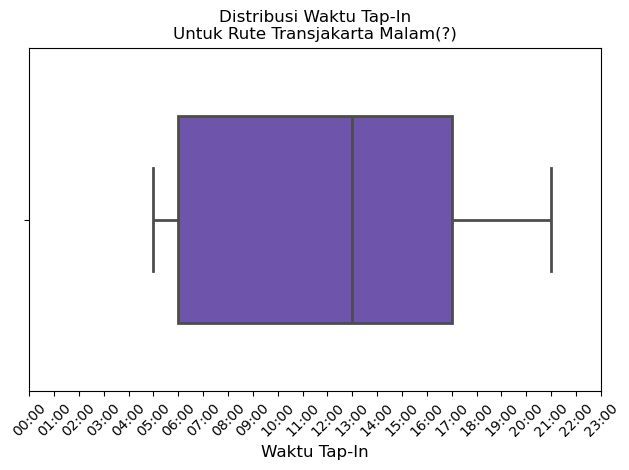

In [55]:
sns.boxplot(
    x=df.query("corridorID.str.startswith('M')")['tapInHour'], 
    color='#6845BA',
    width=0.6,
    linewidth=2
)

plt.title("Distribusi Waktu Tap-In\nUntuk Rute Transjakarta Malam(?)")
plt.xlabel('Waktu Tap-In', fontsize=12)

plt.xticks(range(0, 24), [f'{h:02d}:00' for h in range(0, 24)], rotation=45)
plt.tight_layout()
plt.show()

Secara operasional, rute-rute ini seharusnya beroperasi dari pukul 22.00 hingga 05.00. Namun, data menunjukkan bahwa seluruh rute malam justru beroperasi dari pukul 05.00 hingga 22.00. Kesalahan ini tidak bisa diselesaikan dengan sekadar *time shifting* karena perbedaan jam operasionalnya sangat mendasar. Tidak memungkinkan pula mengubah semua rute-rute malam ini ke rute siang, karena tidak semua rute malam memiliki versi rute siang yang melewati titik halte yang sama.


Seperti yang dapat dilihat pada grafik *boxplot* di atas, distribusi waktu tap-in untuk rute malam berada di rentang waktu yang sama sekali tidak sesuai dengan jadwal operasional yang seharusnya. 

Membiarkan data yang salah ini akan mempengaruhi akurasi berbagai metrik penting seperti rata-rata waktu perjalanan, pola penggunaan pada jam sibuk, rute dengan jumlah penumpang tertinggi. Oleh karena itu, untuk menjaga kualitas dan keakuratan analisis, penulis memutuskan untuk menghapus data rute malam ini dari dataset.

In [56]:
df = df.query("~corridorID.str.startswith('M')")
null_unique_summary(df,
                    original_data_size)\
                        .style\
                        .apply(highlight_cols, 
                               indexes=['unique_cont', 'current_data_size', 'pct_loss'],
                               axis=0)


,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,35558,35558,6.180000
payCardID,37900,0,0.000000,1916,35558,6.180000
payCardBank,37900,0,0.000000,6,35558,6.180000
payCardName,37900,0,0.000000,1909,35558,6.180000
payCardSex,37900,0,0.000000,2,35558,6.180000
payCardBirthDate,37900,0,0.000000,66,35558,6.180000
age,37900,0,0.000000,66,35558,6.180000
ageClass,37900,0,0.000000,4,35558,6.180000
corridorID,37900,0,0.000000,206,35558,6.180000


In [57]:
df.query("corridorID.str.startswith('M')").shape[0]

0

## Splitting (dan EDA/Analisis singkat subset data dengan missing tapout)

Bila diperhatikan, data yang memiliki `tapOutStopsLat` hilang juga memiliki `tapOutStops`,`tapOutStopsName`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` yang hilang berdasarkan dari jumlah NULL-nya yang sama (lihat bawah).

In [58]:
print("Subset data dengan tapOutStopsLat kosong:")
null_unique_summary(df.query('tapOutStopsLat.isna()'), # All rows with null tapOutStopsLat,
                    original_data_size)\
                        .style\
                        .apply(highlight_cells, 
                               row_indexes=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'ride_duration'],
                               column_names=['null_count', 'current_data_size'], axis=0)
## Note: pct_loss dan null_pct berdasarkan original_data_size, jadi valuenya tidak sesuai dengan ukuran data irisan

Subset data dengan tapOutStopsLat kosong:


,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,1225,1225,96.770000
payCardID,37900,0,0.000000,738,1225,96.770000
payCardBank,37900,0,0.000000,6,1225,96.770000
payCardName,37900,0,0.000000,736,1225,96.770000
payCardSex,37900,0,0.000000,2,1225,96.770000
payCardBirthDate,37900,0,0.000000,57,1225,96.770000
age,37900,0,0.000000,57,1225,96.770000
ageClass,37900,0,0.000000,4,1225,96.770000
corridorID,37900,0,0.000000,198,1225,96.770000


 Hal ini dapat diinterpretasikan bahwa sejumlah penumpang lupa melakukan *tap-out* setelah menyelesaikan perjalanan. Beberapa kemungkinan alasan mengapa penumpang lupa melakukan tap out antara lain:

- **Ketidakbiasaan atau ketidaktahuan**: Beberapa penumpang mungkin belum terbiasa dengan sistem *tap-in-tap out*, terutama penumpang baru atau wisatawan.

- **Kondisi halte atau bis**: Pada halte/bis tertentu, lokasi mesin *tap-out* mungkin tidak terlihat jelas atau sulit diakses pada saat tertentu, sehingga penumpang melewatinya tanpa melakukan tap out.

- **Kondisi terburu-buru**: Penumpang yang terburu-buru untuk mengejar jadwal atau pindah ke moda transportasi lain cenderung melewatkan proses tap out.

- **Kelalaian**: Penumpang secara tidak sengaja lupa melakukan tap out karena perhatian mereka teralihkan oleh hal lain, seperti penggunaan ponsel atau percakapan.

Dapat dilihat pula meskipun penumpang lupa melakukan tap out, nilai `payAmount` mereka tidak selalu kosong (bahkan kebanyakan non-NULL). Terkait hal ini, jika penumpang lupa melakukan tap out, kartu mereka akan diblokir sementara. **Kartu tersebut baru dapat digunakan kembali saat penumpang melakukan *tapping* di mesin BCT yang tersedia di halte-halte Transjakarta. Ketika kartu sudah diaktivasi, sistem secara otomatis akan mengambil ongkos perjalanan sebelumnya**.

Meskipun saat ini kelupaan dalam *tap-out* sudah ditangani dengan baik demi kenyamanan pengguna, **penting juga mengurangi jumlah penumpang yang lupa *tap-out* untuk ke depan**. Karena dengan data yang lengkap lebih banyak memungkinkan pihak Transjakarta mengevaluasi efektivitas pelayanan atau dampak kebijakan lain terhadap kepuasan penumpang dengan lebih akurat.

Dari data yang lengkap pula bisa dikembangkan model prediksi yang akurat untuk memahami kebutuhan penumpang di masa depan, seperti estimasi alokasi armada bis optimum, jumlah penumpang per halte atau durasi perjalanan.

Data akan dibagi menjadi dua kelompok utama: data dengan missing *tap-outs* dan data dengan *tap-out* yang lengkap. *Exploratory data analysis* dengan data missing *tap-out* akan dilakukan secara singkat di bawah.

In [59]:
df_missing_tapouts = df.query('tapOutStopsLat.isna()').copy()
df.dropna(subset='tapOutStopsLat', inplace=True)
print("Data tanpa missing tapouts:")
display(null_unique_summary(df, # All rows with null tapOutStopsLat,
                    original_data_size)\
                        .style\
                        .apply(highlight_cells, 
                               row_indexes=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'ride_duration'],
                               column_names=['null_count', 'current_data_size'], axis=0))

print("Data dengan missing tapouts:")
display(null_unique_summary(df_missing_tapouts, # All rows with null tapOutStopsLat,
                    original_data_size)\
                        .style\
                        .apply(highlight_cells, 
                               row_indexes=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'ride_duration'],
                               column_names=['null_count', 'current_data_size'], axis=0))

Data tanpa missing tapouts:


,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,34333,34333,9.410000
payCardID,37900,0,0.000000,1903,34333,9.410000
payCardBank,37900,0,0.000000,6,34333,9.410000
payCardName,37900,0,0.000000,1896,34333,9.410000
payCardSex,37900,0,0.000000,2,34333,9.410000
payCardBirthDate,37900,0,0.000000,66,34333,9.410000
age,37900,0,0.000000,66,34333,9.410000
ageClass,37900,0,0.000000,4,34333,9.410000
corridorID,37900,0,0.000000,206,34333,9.410000


Data dengan missing tapouts:


,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,1225,1225,96.770000
payCardID,37900,0,0.000000,738,1225,96.770000
payCardBank,37900,0,0.000000,6,1225,96.770000
payCardName,37900,0,0.000000,736,1225,96.770000
payCardSex,37900,0,0.000000,2,1225,96.770000
payCardBirthDate,37900,0,0.000000,57,1225,96.770000
age,37900,0,0.000000,57,1225,96.770000
ageClass,37900,0,0.000000,4,1225,96.770000
corridorID,37900,0,0.000000,198,1225,96.770000


In [60]:
df_missing_tapouts[['payCardID', 'payCardSex']].drop_duplicates()['payCardSex'].value_counts()

payCardSex
Wanita    385
Pria      353
Name: count, dtype: int64

In [61]:
print("Skew for each age group:")
df_missing_tapouts[['payCardID', 'age', 'payCardSex']].drop_duplicates().groupby('payCardSex')['age'].skew()

Skew for each age group:


payCardSex
Pria      0.228118
Wanita    0.313725
Name: age, dtype: float64

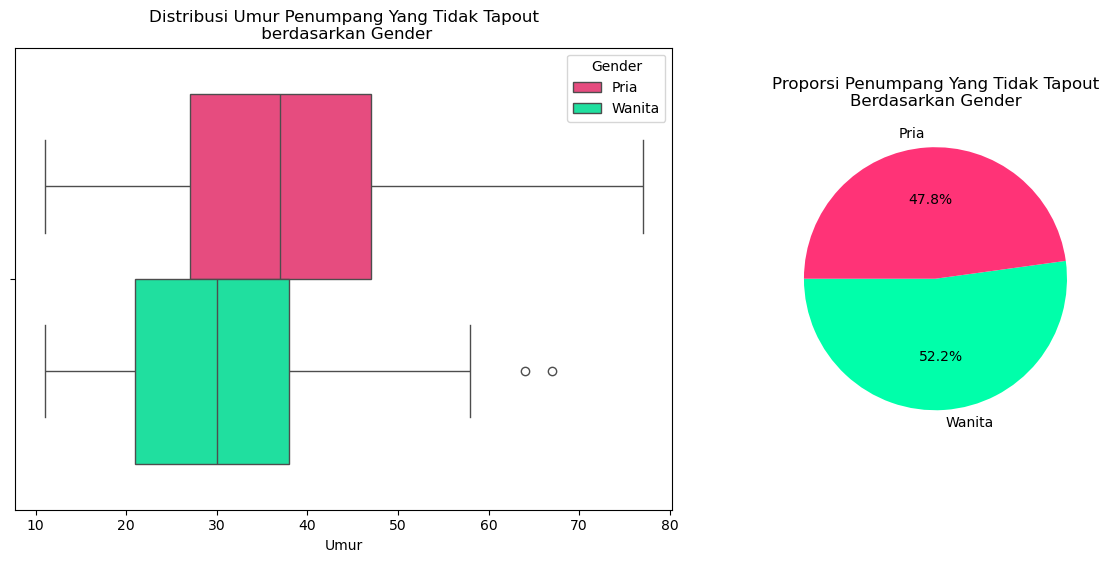

In [62]:
fig, ax = plt.subplots(1,2, figsize=(14, 6), width_ratios=(10, 5))
## Note: satu penumpang yang sama bisa ada di beberapa baris dengan nilai kolom lain yang berbeda 
## sehingga tidak dihitung sebagai duplikat kalau yang dibandingkan adalah antar baris
sns.boxplot(data=df_missing_tapouts[['payCardID', 'age', 'payCardSex']].drop_duplicates(), 
            x='age', 
            hue='payCardSex', 
            palette={'Wanita':'#00ffaa', 'Pria':'#FF3377'},
            ax=ax[0])

ax[0].set_title("Distribusi Umur Penumpang Yang Tidak Tapout\n berdasarkan Gender")
ax[0].legend(title="Gender")
ax[0].set_xlabel("Umur")

ax[1].pie(df_missing_tapouts[['payCardID', 'payCardSex']].drop_duplicates()['payCardSex'].value_counts(),
        labels=df_missing_tapouts[['payCardID', 'payCardSex']].drop_duplicates()['payCardSex'].value_counts().index,
        autopct='%2.1f%%',
        colors=['#00ffaa', '#FF3377'],
        startangle=180)

ax[1].set_title("Proporsi Penumpang Yang Tidak Tapout\nBerdasarkan Gender")

plt.show()

**Dapat dilihat**:
- Proporsi penumpang wanita yang lupa *tap-out* sedikit lebih banyak dibanding penumpang pria.

- Distribusi kedua kelompok umur cenderung tidak terdistribusi normal dan cenderung *skew* kanan meskipun besar *skew*-nya relatif kecil.

- Penumpang pria yang lupa *tap-out* memiliki median umur lebih tua (~36 tahun) dibanding penumpang wanita (~30 tahun).

- Penumpang pria memiliki distribusi yang lebih lebar ke kanan dibandingkan wanita, menunjukkan bahwa penumpang pria yang lebih lupa tapout cenderung lebih tua dibanding penumpang wanita.

Dalam dua kelompok tersebut, rata-rata umur penumpang yang lupa *tap-out* adalah sekitar 30-an. Rentang usia ini adalah masa produktif, dimana individu cenderung memiliki mobilitas tinggi karena pekerjaan, aktivitas sosial, atau keluarga. Tingkat kesibukan kelompok ini yang tinggi dapat menyebabkan mereka lebih sering lupa melakukan tap out saat turun dari bus Transjakarta.

**Saran**:
- Sosialisasi melalui media yang relevan dengan usia 30-an (instagram, twitter, youtube, etc.) untuk menjelaskan bahwa *tap out* tidak hanya untuk menyelesaikan transaksi, tetapi juga membantu Transjakarta dalam memantau pola perjalanan untuk meningkatkan layanan.

- Tambahkan pengingat visual/audio di dalam bus dan halte, terutama menjelang titik pemberhentian terakhir. Pesan seperti "Jangan lupa *tap out* sebelum keluar" dapat membantu penumpang mengingat tindakan ini. 

- Pengingat dapat lebih efektif jika dibuat interaktif atau menarik, seperti menggunakan slogan atau ikon visual yang relevan dengan rentang usia ini.

- Jika memungkinkan, evaluasi sistem untuk memudahkan proses pengambilan data *tap out*. Misalnya, menggunakan teknologi yang secara otomatis mendeteksi lokasi turun tanpa perlu penumpang *tap out* secara manual.

- Jika memungkinkan, evaluasi lebih lanjut mengenai hal-hal terkait aksesibilitas fitur *tap-out* untuk penumpang wanita.

## Cleaning `payAmount`

In [63]:
df.query("payAmount.isna()")[['corridorID', 'corridorName']].drop_duplicates()

,corridorID,corridorName
76,JAK.48B,Stasiun Tebet - Kampung Melayu
97,3H,Jelambar - Kota
198,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin


In [64]:
print("Subset data dengan corridorID == 'JAK.48B' atau '3H' atau 'JAK.48A':")
display(null_unique_summary(df.query('corridorID.isin(["JAK.48B", "3H", "JAK.48A"])'),
                    original_data_size).loc['tapOutStops':]\
                        .style\
                        .apply(highlight_cells, 
                               row_indexes=['payAmount'],
                               column_names=['null_count', 'current_data_size'], axis=0))

Subset data dengan corridorID == 'JAK.48B' atau '3H' atau 'JAK.48A':


,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
tapOutStops,37900,0,0.000000,42,490,98.710000
tapOutStopsName,37900,0,0.000000,42,490,98.710000
tapOutStopsLat,37900,0,0.000000,42,490,98.710000
tapOutStopsLon,37900,0,0.000000,42,490,98.710000
stopEndSeq,37900,0,0.000000,22,490,98.710000
tapOutTime,37900,0,0.000000,490,490,98.710000
ride_duration,37900,0,0.000000,470,490,98.710000
payAmount,37900,490,1.290000,0,490,98.710000


Dapat dilihat bahwa semua rute `JAK.48B`, `3H`, dan `JAK48A` memiliki `payAmount` yang NULL.

In [65]:
df['payAmount'].unique()

array([ 3500., 20000.,     0.,    nan])

Rute Jaklingko (`corridorID` dimulai dengan 'JAK') tidak berbayar sedangkan rute 3H adalah rute BRT biasa non-royal (https://transjakarta.co.id/). Karena rute biasa memiliki tarif Rp3.500, imputasi dapat dilakukan sebagai berikut:

In [66]:
corridorID_payAmount_dict = {'JAK.48B':0.0, '3H':3500.0, 'JAK.48A':0.0}
corridorID_payAmount_dict

{'JAK.48B': 0.0, '3H': 3500.0, 'JAK.48A': 0.0}

In [67]:
df.loc[:,'payAmount'] = df['payAmount'].fillna(df['corridorID'].map(corridorID_payAmount_dict))
display(null_unique_summary(df,
                    original_data_size)\
                        .style\
                        .apply(highlight_rows, 
                               indexes=['payAmount'], axis=1))

,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.000000,34333,34333,9.410000
payCardID,37900,0,0.000000,1903,34333,9.410000
payCardBank,37900,0,0.000000,6,34333,9.410000
payCardName,37900,0,0.000000,1896,34333,9.410000
payCardSex,37900,0,0.000000,2,34333,9.410000
payCardBirthDate,37900,0,0.000000,66,34333,9.410000
age,37900,0,0.000000,66,34333,9.410000
ageClass,37900,0,0.000000,4,34333,9.410000
corridorID,37900,0,0.000000,206,34333,9.410000


## Pengelompokan `rideType`

Untuk membantu analisis, digunakan pula data eksternal untuk mengelompokkan jenis layanan yang digunakan. Data diambil dari https://transjakarta.co.id/rute pada November 2024.
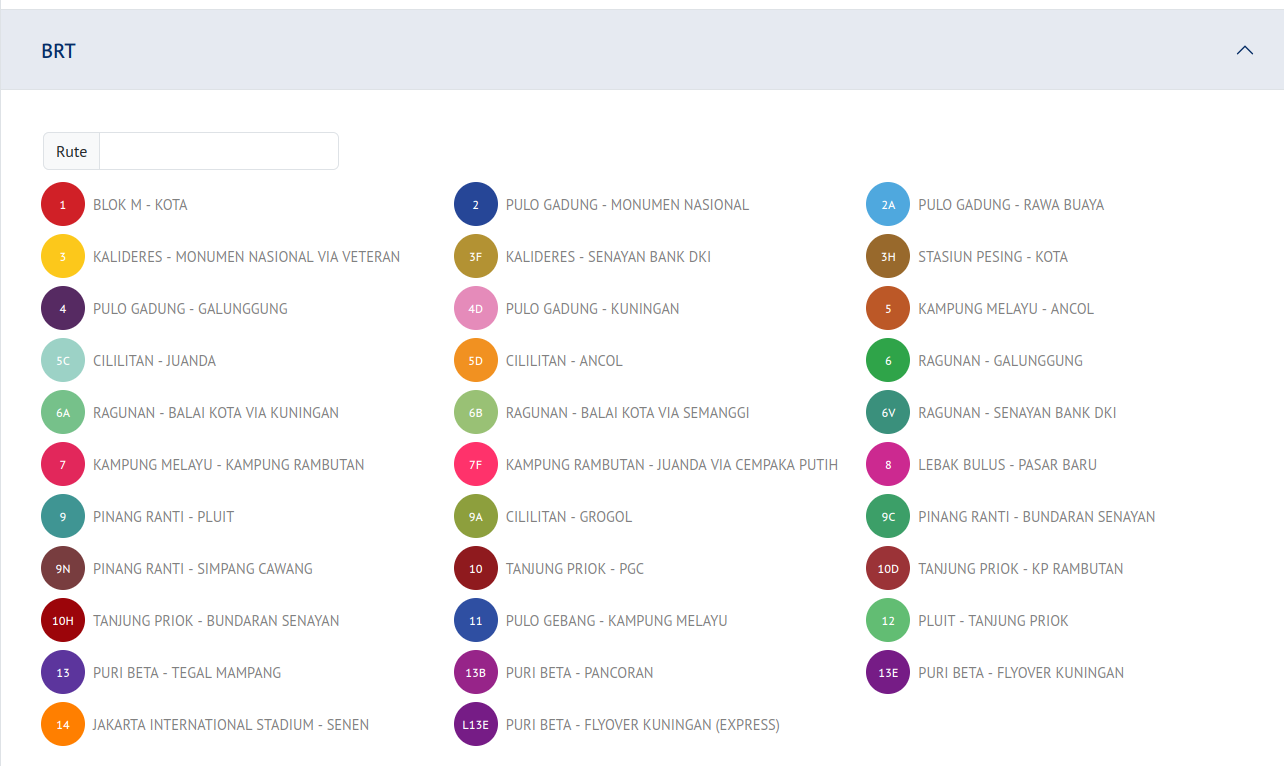
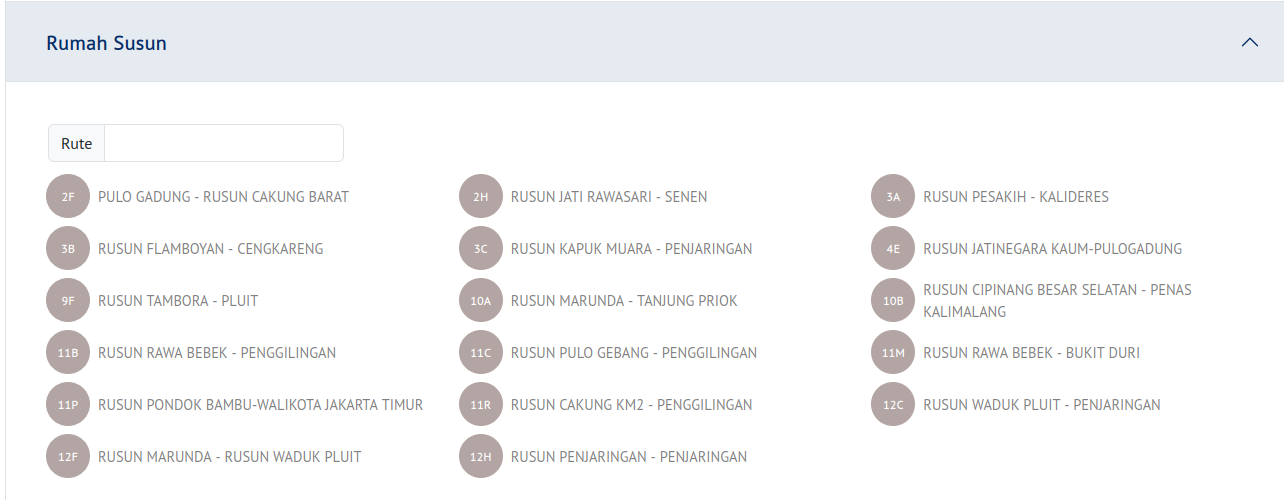
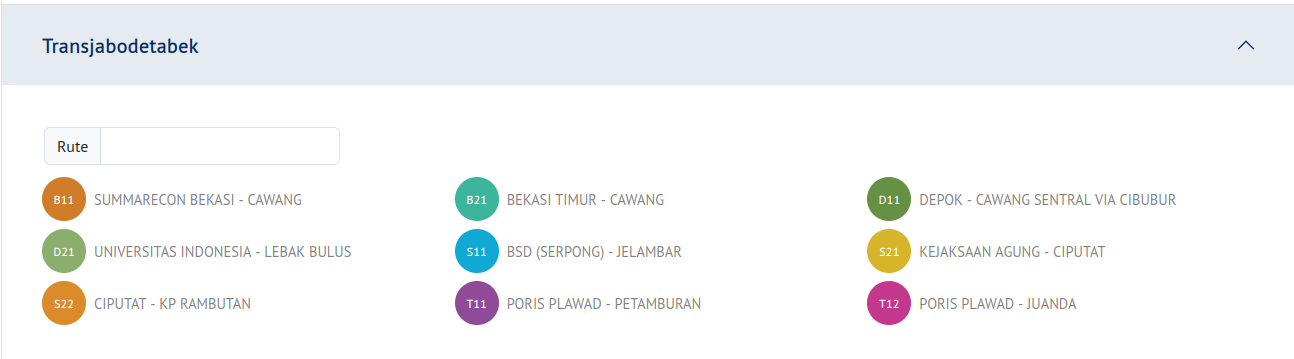
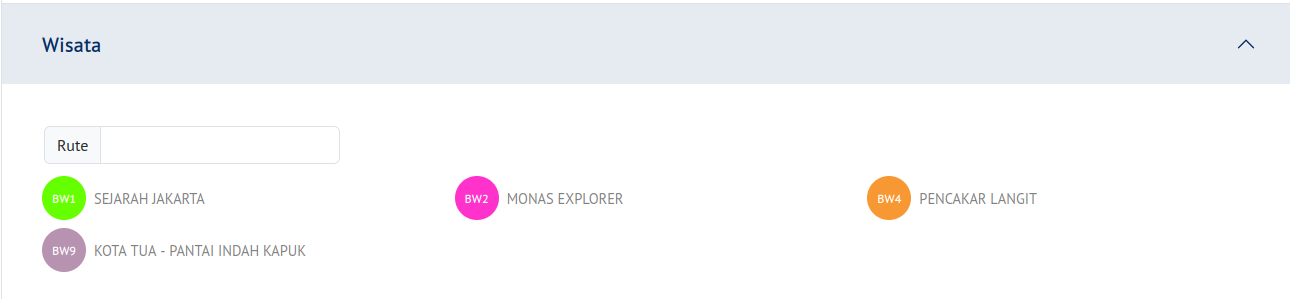
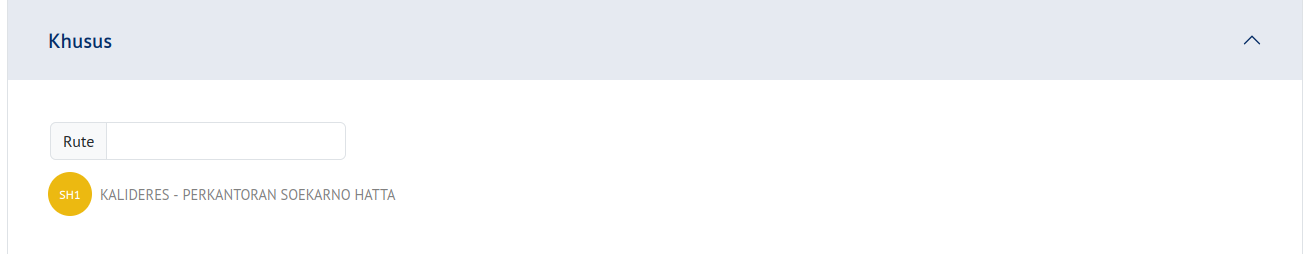

Rute historis dapat dicek di *website* resmi Transjakarta. Karena tidak ada data bis AMARI (bis malam) dalam dataset dan Mikrotrans (Jaklingko) dan Royaltrans dapat ditentukan masing-masing dari `corridorID` dan `payAmount`, sisa data yang lain harusnya adalah layanan dengan tipe bis pengumpan.

In [68]:
## Rute historis ditambahkan sesuai kebutuhan data rute yang digunakan pada April 2023
list_BRT = ['1',
 '2','2A',
 '3','3F','3H',
 '4','4D',
 '5','5C','5D',
 '6','6A','6B','6V',
 '7','7F',
 '8','8A',
 '9','9A','9C','9N',
 '10','10D','10H',
 '11',
 '12',
 '13','13B','13C', '13D','13E', 'L13E',
 '14'
]
list_BRT = set(list_BRT)
## 13C -> rute historis, tidak beroperasi saat November 2024
## 13D -> rute historis, tidak beroperasi saat November 2024
## 8A -> rute historis, tidak beroperasi saat November 2024

list_rumah_susun = ['2E','2F','2H',
 '3A','3B','3C',
 '4E',
 '9F',
 '10A','10B',
 '11B','11C','11K','11M','11N','11P','11R',
 '12C','12F','12H']
#2E -> rute historis, tidak beroperasi saat November 2024
#11K -> rute historis, tidak beroperasi saat November 2024
#11N -> rute historis, tidak beroperasi saat November 2024
list_rumah_susun = set(list_rumah_susun)

list_wisata = ['BW1', 'BW2', 'BW4', 'BW9']
list_wisata = set(list_wisata)

list_khusus = ['SH1']
list_khusus = set(list_khusus)

list_transjabodetabek = ['B11', 'B21', 'D11', 'D21', 'S11', 'S21', 'S22', 'T11', 'T12']
list_transjabodetabek = set(list_transjabodetabek)

In [69]:
def classify_ride(row):
    if row['payAmount'] > 19999:
        return "Royaltrans"
    elif 'JAK' in row['corridorID']:
        return "Mikrotrans"
    elif row['corridorID'] in list_BRT:
        return "BRT"
    elif row['corridorID'] in list_khusus:
        return "Khusus"
    elif row['corridorID'] in list_rumah_susun:
        return "Rumah Susun"
    elif row['corridorID'] in list_transjabodetabek:
        return "Transjabodetabek"
    elif row['corridorID'] in list_wisata:
        return "Wisata"
    else:
        return "Pengumpan"

In [70]:
df['rideType'] = df.apply(classify_ride, axis=1)
df['rideType']

0               BRT
1         Pengumpan
2         Pengumpan
3         Pengumpan
4               BRT
            ...    
37895           BRT
37896           BRT
37897    Royaltrans
37898    Mikrotrans
37899           BRT
Name: rideType, Length: 34333, dtype: object

In [71]:
df['rideType'].value_counts()

rideType
Mikrotrans          13357
Pengumpan            8617
BRT                  5979
Rumah Susun          2946
Royaltrans           1683
Transjabodetabek     1533
Wisata                218
Name: count, dtype: int64

In [72]:
df.groupby('rideType')['payAmount'].unique()

rideType
BRT                      [3500.0]
Mikrotrans                  [0.0]
Pengumpan                [3500.0]
Royaltrans              [20000.0]
Rumah Susun         [0.0, 3500.0]
Transjabodetabek         [3500.0]
Wisata                      [0.0]
Name: payAmount, dtype: object

In [73]:
df_missing_tapouts['rideType'] = df_missing_tapouts.apply(classify_ride, axis=1)
df_missing_tapouts['rideType'].isna().sum()

0

In [74]:
df_missing_tapouts.groupby('rideType')['payAmount'].unique()

rideType
BRT                 [3500.0, nan]
Mikrotrans             [0.0, nan]
Pengumpan                [3500.0]
Royaltrans              [20000.0]
Rumah Susun         [0.0, 3500.0]
Transjabodetabek         [3500.0]
Wisata                      [0.0]
Name: payAmount, dtype: object

In [75]:
df_missing_tapouts.query("rideType == 'Rumah Susun' and payAmount > 0")['corridorID'].unique()

array(['12H'], dtype=object)

In [76]:
df.query("rideType == 'Rumah Susun' and payAmount > 0")['corridorID'].unique()

array(['12H'], dtype=object)

In [77]:
df_missing_tapouts.query("corridorID == '12H'")['payAmount'].unique()

array([3500.])

In [78]:
df.query("corridorID == '12H'")['payAmount'].unique()

array([3500.])

Layanan trayek "Rusun" Transjakarta seharusnya [gratis](https://www.liputan6.com/news/read/2414292/ini-rute-transjakarta-gratis-untuk-warga-penghuni-rusunawa). Namun dalam data menunjukkan ada satu rute dalam kelompok "Rusun" dimana seluruh penumpang membayar biaya sebesar Rp3.500   

In [79]:
print("Data Tanpa Mising Tap Outs")
print("Total pembayaran dari rute 12H (Rupiah):", df.query("corridorID == '12H'")['payAmount'].sum())
print("Jumlah transaksi dari rute 12H:", df.query("corridorID == '12H'").shape[0])
print("Jumlah pengguna koridor rute 12H:", df.query("corridorID == '12H'")['payCardID'].nunique())

Data Tanpa Mising Tap Outs
Total pembayaran dari rute 12H (Rupiah): 479500.0
Jumlah transaksi dari rute 12H: 137
Jumlah pengguna koridor rute 12H: 11


In [80]:
print("Data Dengan Mising Tap Outs")
print("Total pembayaran dari rute 12H (Rupiah):", df_missing_tapouts.query("corridorID == '12H'")['payAmount'].sum())
print("Jumlah transaksi dari rute 12H:", df_missing_tapouts.query("corridorID == '12H'").shape[0])
print("Jumlah pengguna koridor rute 12H:", df_missing_tapouts.query("corridorID == '12H'")['payCardID'].nunique())

Data Dengan Mising Tap Outs
Total pembayaran dari rute 12H (Rupiah): 17500.0
Jumlah transaksi dari rute 12H: 5
Jumlah pengguna koridor rute 12H: 3


In [81]:
## Handle Rusun 12H
df.loc[df['corridorID'] == '12H', 'payAmount'] = 0
df.groupby('rideType')['payAmount'].unique()

rideType
BRT                  [3500.0]
Mikrotrans              [0.0]
Pengumpan            [3500.0]
Royaltrans          [20000.0]
Rumah Susun             [0.0]
Transjabodetabek     [3500.0]
Wisata                  [0.0]
Name: payAmount, dtype: object

In [82]:
df_missing_tapouts.loc[df_missing_tapouts['corridorID'] == '12H', 'payAmount'] = 0
df_missing_tapouts.groupby('rideType')['payAmount'].unique()

rideType
BRT                 [3500.0, nan]
Mikrotrans             [0.0, nan]
Pengumpan                [3500.0]
Royaltrans              [20000.0]
Rumah Susun                 [0.0]
Transjabodetabek         [3500.0]
Wisata                      [0.0]
Name: payAmount, dtype: object

In [83]:
print("Data dengan missing tapouts:")
display(null_unique_summary(df_missing_tapouts, original_data_size))
print("Data tanpa missing tapouts:")
display(null_unique_summary(df, original_data_size))

Data dengan missing tapouts:


,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.00,1225,1225,96.77
payCardID,37900,0,0.00,738,1225,96.77
payCardBank,37900,0,0.00,6,1225,96.77
payCardName,37900,0,0.00,736,1225,96.77
payCardSex,37900,0,0.00,2,1225,96.77
payCardBirthDate,37900,0,0.00,57,1225,96.77
age,37900,0,0.00,57,1225,96.77
ageClass,37900,0,0.00,4,1225,96.77
corridorID,37900,0,0.00,198,1225,96.77


Data tanpa missing tapouts:


,original_data_size,null_count,null_pct,unique_count,current_data_size,pct_loss
column,,,,,,
transID,37900,0,0.0,34333,34333,9.41
payCardID,37900,0,0.0,1903,34333,9.41
payCardBank,37900,0,0.0,6,34333,9.41
payCardName,37900,0,0.0,1896,34333,9.41
payCardSex,37900,0,0.0,2,34333,9.41
payCardBirthDate,37900,0,0.0,66,34333,9.41
age,37900,0,0.0,66,34333,9.41
ageClass,37900,0,0.0,4,34333,9.41
corridorID,37900,0,0.0,206,34333,9.41


# Analisis Data Utama
***
## EDA

In [84]:
print(f"Rata-rata penumpang mengeluarkan Rp.{int(np.round(df.groupby('payCardID')['payAmount'].sum().mean()/10)*10)} untuk naik Transjakarta dalam sebulan.")

Rata-rata penumpang mengeluarkan Rp.47350 untuk naik Transjakarta dalam sebulan.


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34333 entries, 0 to 37899
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           34333 non-null  object        
 1   payCardID         34333 non-null  object        
 2   payCardBank       34333 non-null  object        
 3   payCardName       34333 non-null  object        
 4   payCardSex        34333 non-null  object        
 5   payCardBirthDate  34333 non-null  int64         
 6   age               34333 non-null  int64         
 7   ageClass          34333 non-null  category      
 8   corridorID        34333 non-null  object        
 9   corridorName      34333 non-null  object        
 10  direction         34333 non-null  float64       
 11  tapInStops        34333 non-null  object        
 12  tapInStopsName    34333 non-null  object        
 13  tapInStopsLat     34333 non-null  float64       
 14  tapInStopsLon     34333 non

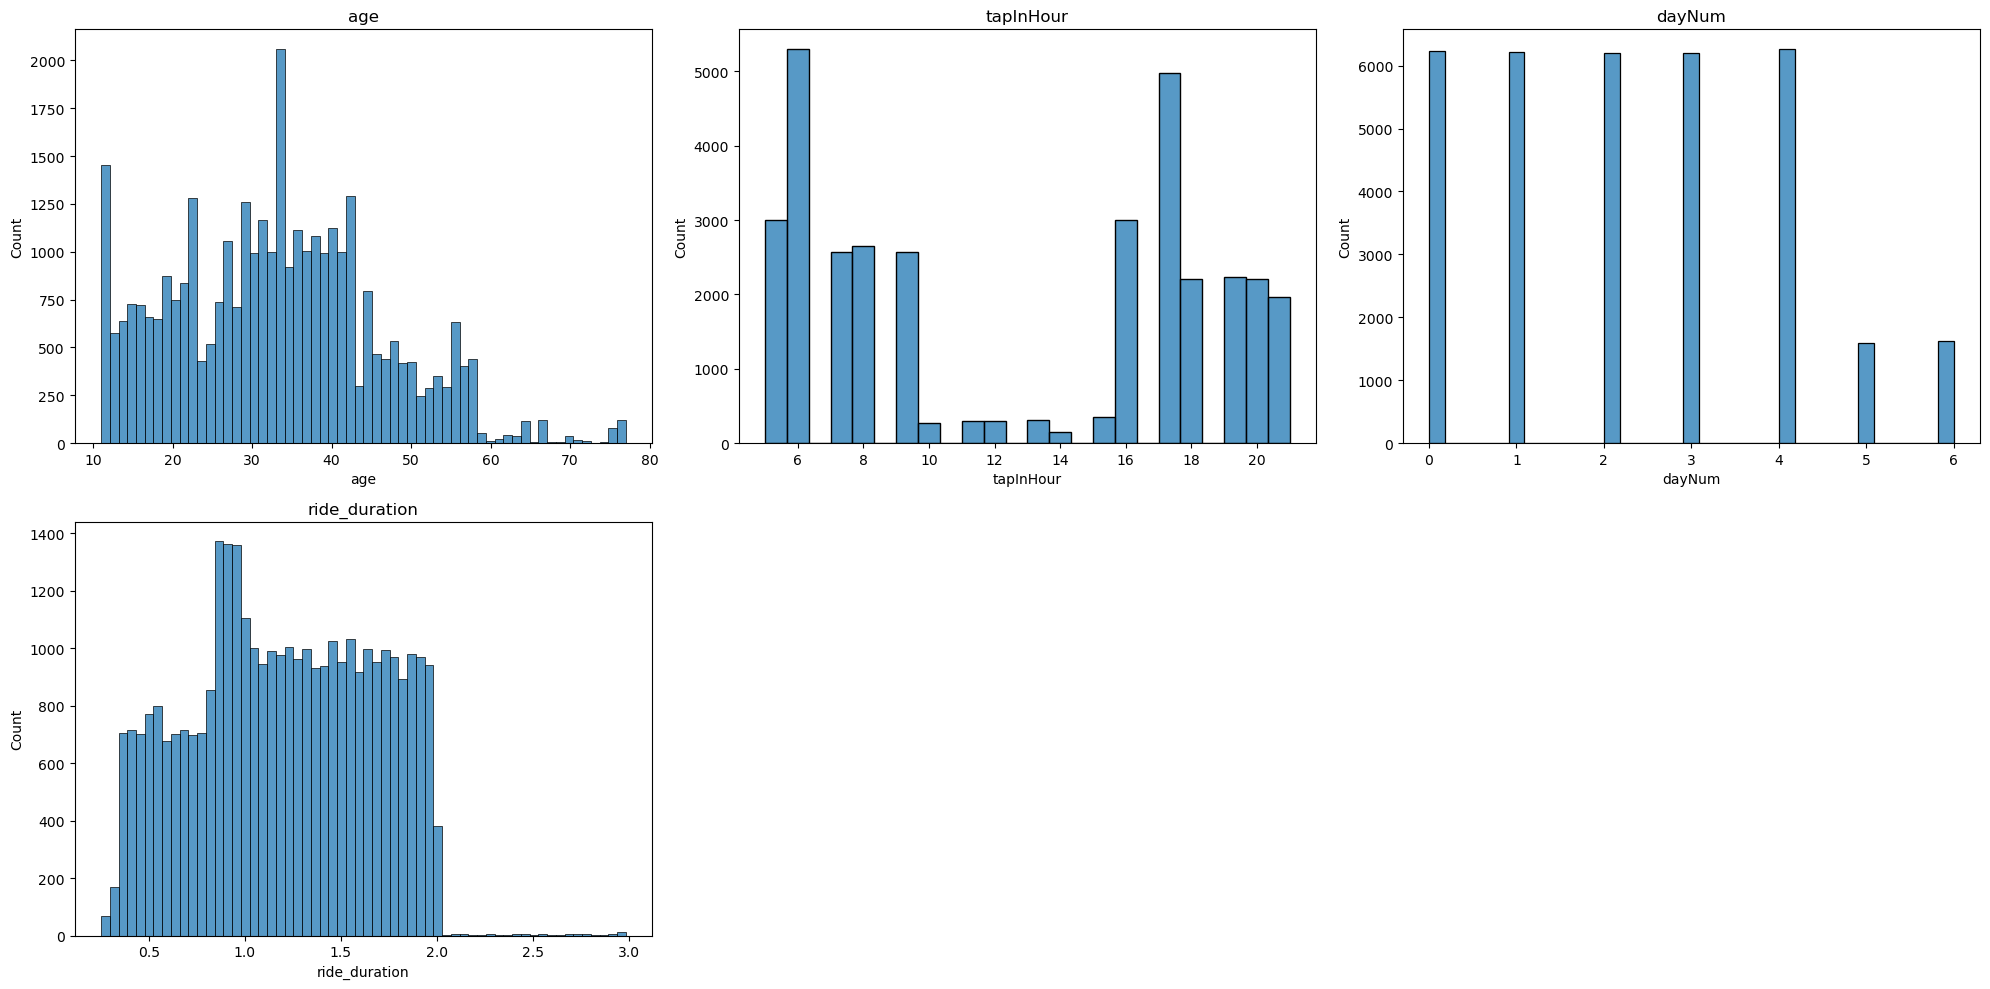

In [86]:
numerical_cols = ['age', 'tapInHour', 'dayNum', 'ride_duration']
num_cols = 3
num_rows = int(np.ceil(len(numerical_cols) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))


axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col, fontsize=12)

        
for ax in axes[len(numerical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Dari hasil di atas dapat dilihat bahwa kolom numerik cenderung terdistribusi tidak normal *skew kanan* kecuali untuk `tapInHour` yang non-normal dan terdistribusi secara bimodal.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34333 entries, 0 to 37899
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           34333 non-null  object        
 1   payCardID         34333 non-null  object        
 2   payCardBank       34333 non-null  object        
 3   payCardName       34333 non-null  object        
 4   payCardSex        34333 non-null  object        
 5   payCardBirthDate  34333 non-null  int64         
 6   age               34333 non-null  int64         
 7   ageClass          34333 non-null  category      
 8   corridorID        34333 non-null  object        
 9   corridorName      34333 non-null  object        
 10  direction         34333 non-null  float64       
 11  tapInStops        34333 non-null  object        
 12  tapInStopsName    34333 non-null  object        
 13  tapInStopsLat     34333 non-null  float64       
 14  tapInStopsLon     34333 non

In [88]:
df.describe()

,payCardBirthDate,age,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapInHour,dayNum,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,ride_duration,payAmount
count,34333.000000,34333.000000,34333.000000,34333.000000,34333.000000,34333.000000,34333,34333.000000,34333.000000,34333.000000,34333.000000,34333.000000,34333,34333.000000,34333.000000
mean,1990.088748,32.911252,0.500451,-6.215486,106.842228,13.856086,2023-04-16 07:57:30.003670016,12.524656,2.330440,-6.215138,106.841921,21.593132,2023-04-16 09:09:37.714472960,1.202142,2624.632278
min,1946.000000,11.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,5.000000,0.000000,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.250000,0.000000
25%,1982.000000,23.000000,0.000000,-6.247620,106.803560,4.000000,2023-04-10 08:52:16,7.000000,1.000000,-6.248836,106.801640,11.000000,2023-04-10 10:08:15,0.852222,0.000000
50%,1990.000000,33.000000,1.000000,-6.214775,106.835470,11.000000,2023-04-16 17:50:31,13.000000,2.000000,-6.214956,106.835510,19.000000,2023-04-16 19:14:17,1.197222,3500.000000
75%,2000.000000,41.000000,1.000000,-6.175579,106.883520,20.000000,2023-04-21 21:48:06,18.000000,4.000000,-6.174736,106.884940,30.000000,2023-04-21 23:23:42,1.596389,3500.000000
max,2012.000000,77.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,21.000000,6.000000,-6.091746,107.023660,77.000000,2023-04-30 23:02:37,2.984167,20000.000000
std,12.958398,12.958398,0.500007,0.058678,0.060924,12.436210,NaN,5.722953,1.697674,0.059615,0.061606,14.031146,NaN,0.467291,4298.211407


## Analisis Demografi Pengguna Layanan Transjakarta

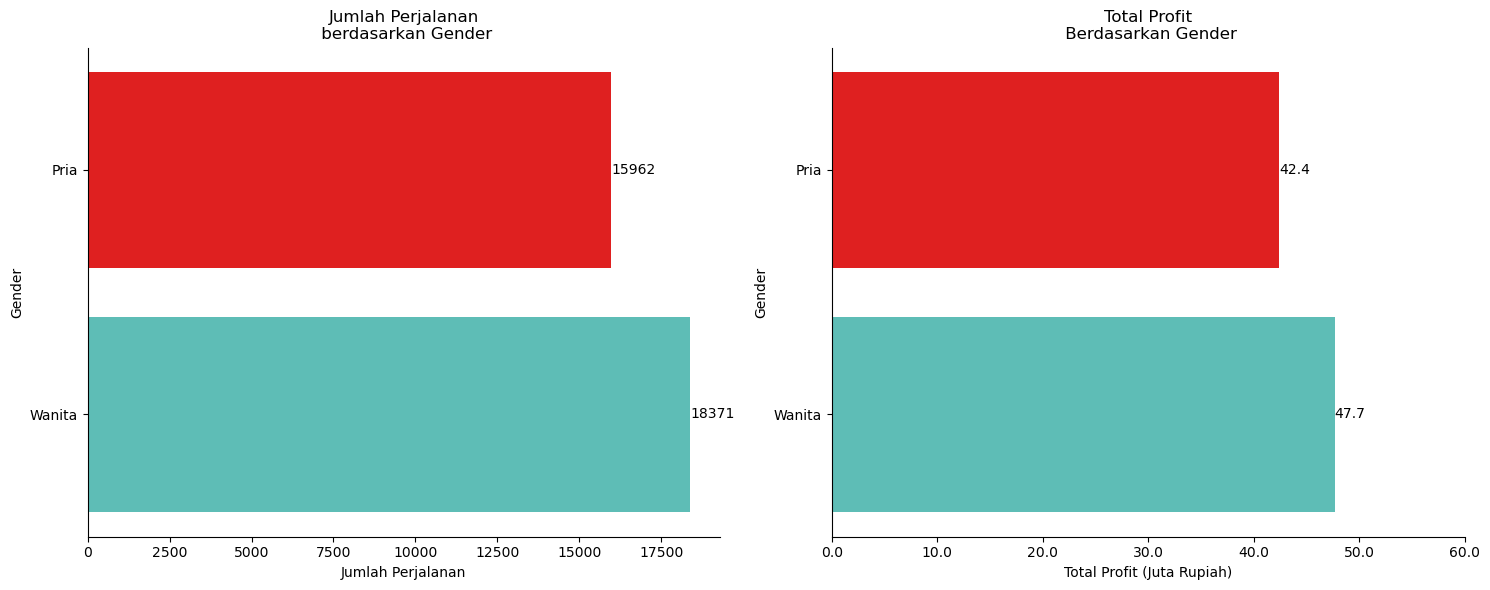

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

count_plot = sns.countplot(data=df, y='payCardSex', hue='payCardSex', palette={'Pria':'red', 'Wanita':'#4ECDC4'}, ax=ax[0])
ax[0].set_xlabel('Jumlah Perjalanan')
ax[0].set_ylabel('Gender')
ax[0].set_title("Total Profit\n Gender")
ax[0].set_title("Jumlah Perjalanan\n berdasarkan Gender")


# Annotate bars for first plot
for i, bar in enumerate(count_plot.patches):
    width = bar.get_width()
    ax[0].text(width, bar.get_y() + bar.get_height()/2, 
               f'{width:.0f}', 
               va='center', ha='left')


bar_plot = sns.barplot(data=df, y='payCardSex', x='payAmount', hue='payCardSex', palette={'Pria':'red', 'Wanita':'#4ECDC4'}, 
            estimator='sum', errorbar=None, ax=ax[1])
ax[1].set_xlabel('Total Profit (Juta Rupiah)')
ax[1].set_ylabel('Gender')
ax[1].set_title("Total Profit\n Berdasarkan Gender")

# Convert x-ticks to millions
x_ticks = ax[1].get_xticks()
x_labels = [f'{x/1000000:.1f}' for x in x_ticks]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)


# Annotate bars for second plot
for i, bar in enumerate(bar_plot.patches):
    width = bar.get_width()
    ax[1].text(width, bar.get_y() + bar.get_height()/2, 
               f'{width/1000000:.1f}', 
               va='center', ha='left')


# Remove top, bottom and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Dari haisl di atas, dapat dilihat **pengguna perempuan merupakan segmen pengguna yang paling banyak menggunakan layanan Transjakarta dan juga yang paling banyak berkontribusi terhadap profit.**

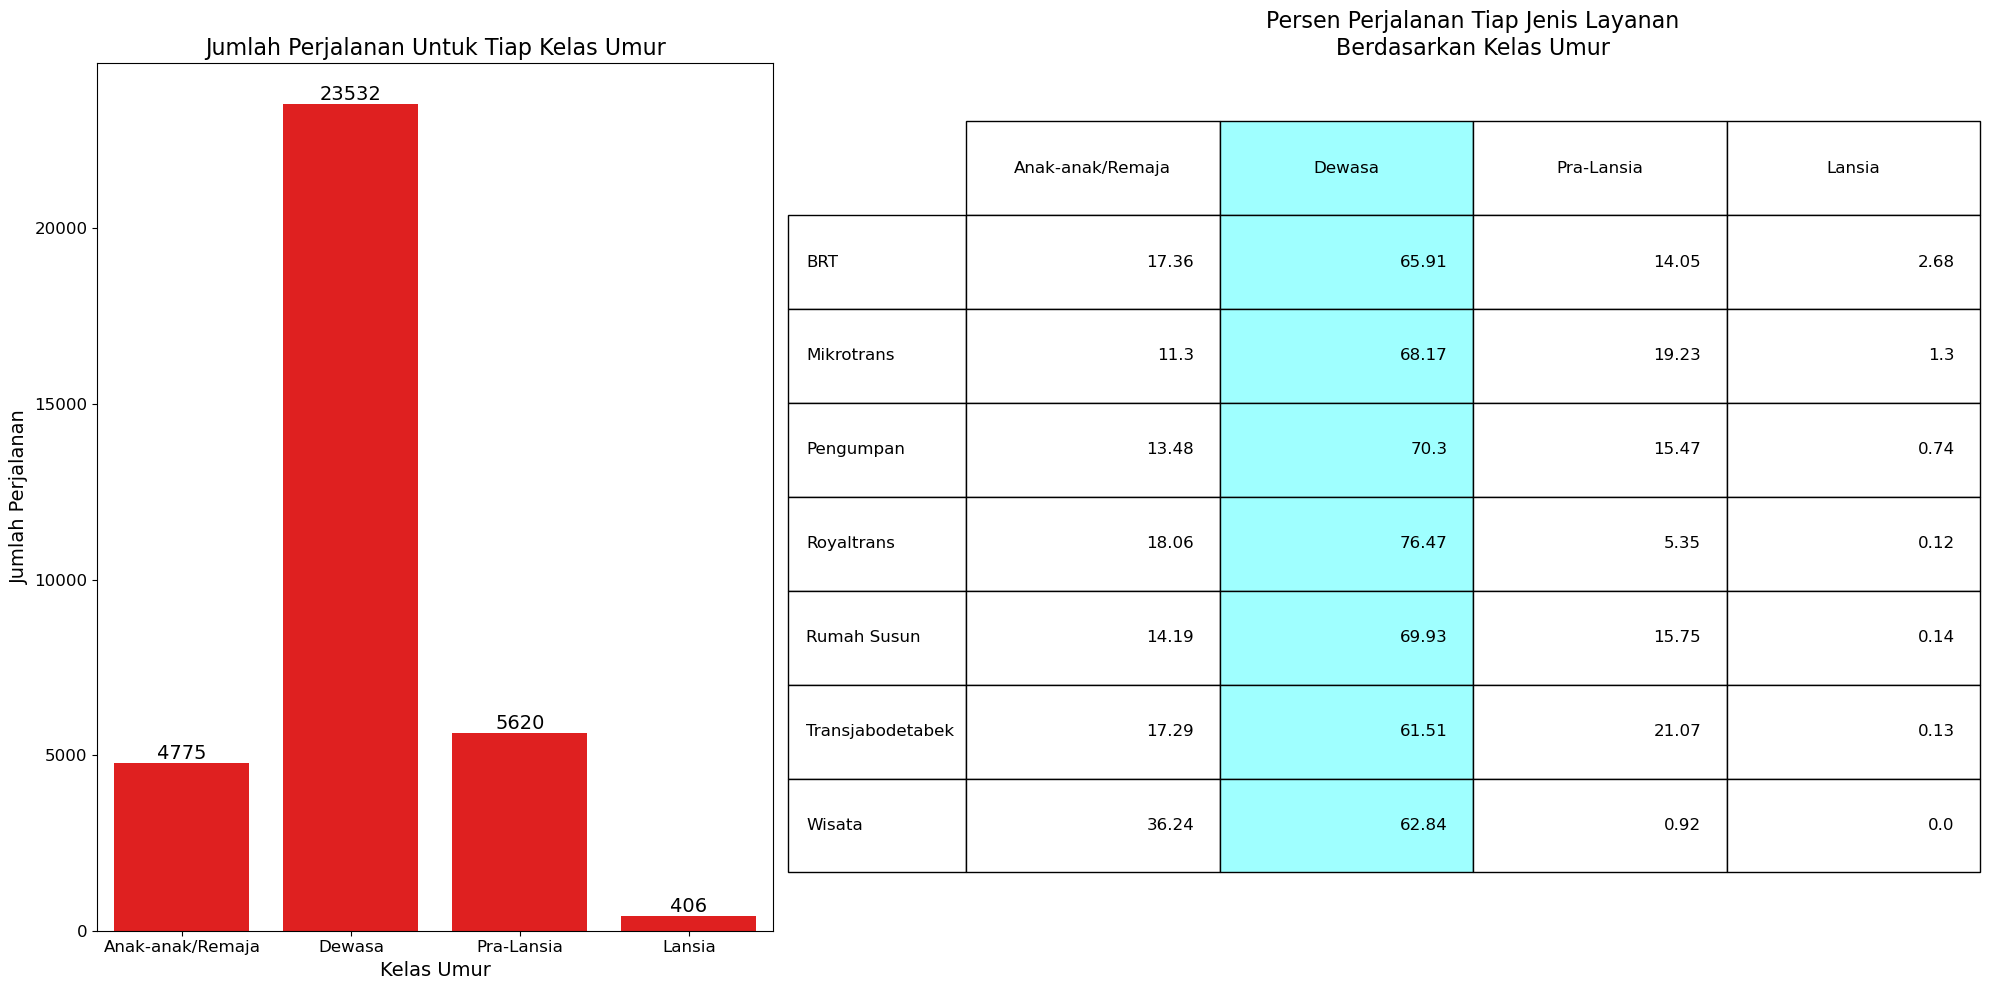

In [90]:
transaction_pct_by_ridetype_ageclass = (pd.crosstab(df['rideType'], df['ageClass'],normalize='index') * 100).round(2)

fig, ax = plt.subplots(1, 2, figsize=(20, 10), width_ratios=(1, 1.5))

sns.countplot(df, x='ageClass', ax=ax[0], color='red')
ax[1] = plt.table(transaction_pct_by_ridetype_ageclass.values,
          colLabels=transaction_pct_by_ridetype_ageclass.columns,
          rowLabels=transaction_pct_by_ridetype_ageclass.index,
          loc='center')

ax[0].set_title('Jumlah Perjalanan Untuk Tiap Kelas Umur', fontsize=16)
ax[0].set_xlabel('Kelas Umur', fontsize=14)
ax[0].set_ylabel('Jumlah Perjalanan', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# Annotate each bar
for i in ax[0].containers[0]:

    height = i.get_height()

    ax[0].text(i.get_x() + i.get_width()/2., height,
               f'{int(height)}', 
               ha='center', va='bottom', fontsize=14)


# Something something table appearance
ax[1].auto_set_font_size(False)
ax[1].set_fontsize(12)  # Table Font
ax[1].scale(1, 5)  # Table ratio


for i in range(transaction_pct_by_ridetype_ageclass.shape[0] + 1):  # +1 to include last row
    cell = ax[1][i, 1]
    cell.set_facecolor('#9FFFFF') 

plt.title("Persen Perjalanan Tiap Jenis Layanan\nBerdasarkan Kelas Umur", fontsize=16, loc='center')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.show()

Dari grafik di atas dapat dilihat **kelas umur "Dewasa" adalah segmen terbesar dari pengguna Transjakarta, dan juga segmen terbesar pada semua kategori layanan** . Visualisasi untuk melihat proporsi kelas umur lainnya pada tiap jenis layanan akan ditunjukkan di grafik selanjutnya.

In [91]:
transaction_count_by_ridetype_ageclass = (pd.crosstab(df['rideType'], df['ageClass'])).drop(columns='Dewasa')
transaction_count_by_ridetype_ageclass

ageClass,Anak-anak/Remaja,Pra-Lansia,Lansia
rideType,,,
BRT,1038,840,160
Mikrotrans,1509,2568,174
Pengumpan,1162,1333,64
Royaltrans,304,90,2
Rumah Susun,418,464,4
Transjabodetabek,265,323,2
Wisata,79,2,0


In [92]:
def make_autopct(values):
    # for hiding zero percentages
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})' if pct > 0 else ''

    return my_autopct

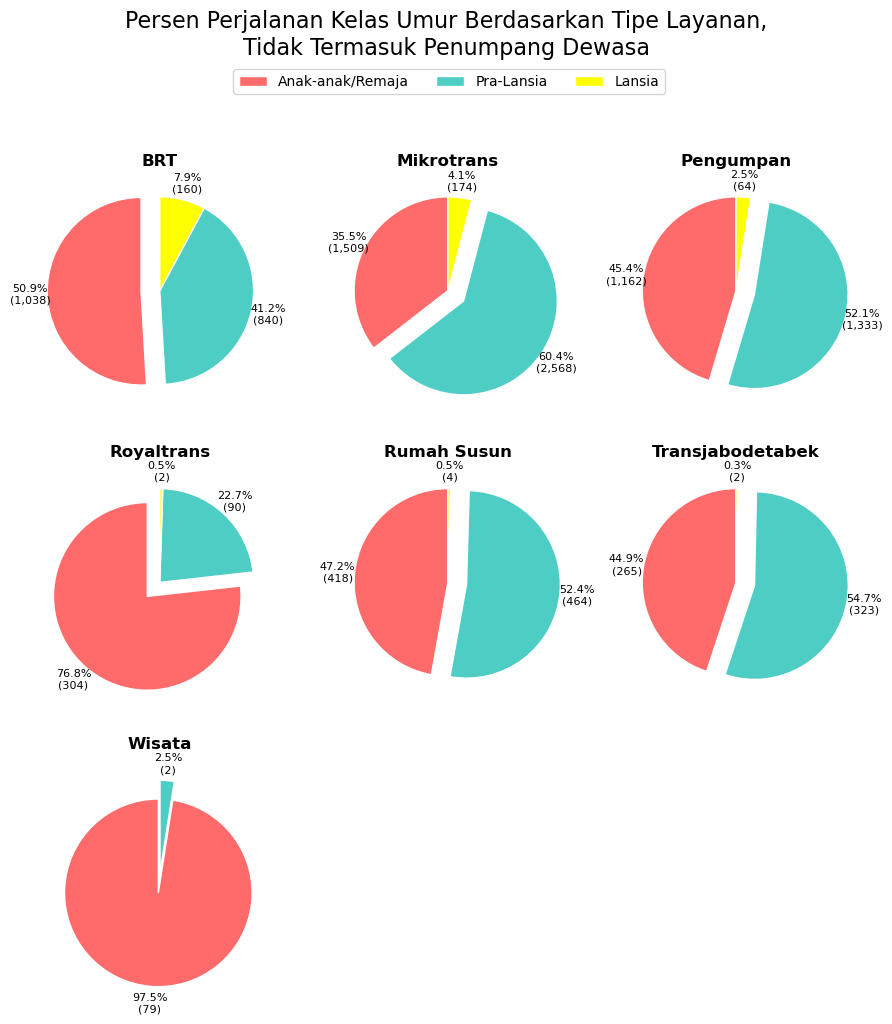

In [93]:
colors = ['#FF6B6B', '#4ECDC4', '#FEFF00', '#FDCB6E']

num_charts = transaction_count_by_ridetype_ageclass.shape[0]
num_rows = int(np.ceil(num_charts / 3))

fig, ax = plt.subplots(num_rows, 3, figsize=(9, 3.5*num_rows))
fig.suptitle('Persen Perjalanan Kelas Umur Berdasarkan Tipe Layanan,\nTidak Termasuk Penumpang Dewasa', fontsize=16)

ax = ax.flatten()

for i, (ride_type, data) in enumerate(transaction_count_by_ridetype_ageclass.iterrows()):
        largest_group_index = data.values.argmax()

        explode = [0.2 if j == largest_group_index else 0 for j in range(len(data))]
        ax[i].pie(data.values, 
                    colors=colors[:len(data)],
                    explode=explode,
                    startangle=90,
                    autopct=make_autopct(data.values),
                    pctdistance=1.18,
                    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                    textprops={'fontsize': 8})

        ax[i].set_title(ride_type, fontweight='bold')


# Remove any unused subplots
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

fig.legend(transaction_count_by_ridetype_ageclass.columns, 
           loc='upper right', 
           ncol=len(transaction_count_by_ridetype_ageclass.columns), 
           bbox_to_anchor=(0.75, 0.93),
           fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### **Insights**
#### **Proporsi Penumpang Lansia**
- **Proporsi penumpang lansia terkecil di seluruh kelompok layanan**

- Beberapa layanan seperti Royaltrans, Rumahsusun, dan Transjabodetabek hampir tidak memiliki penumpang lansia

- Layanan wisata tidak memiliki penumpang lansia sama sekali.

- **Kemungkinan Penyebab**:
  - **Risiko Kesehatan**: Lansia mungkin masih khawatir menggunakan transportasi umum karena risiko kesehatan setelah pandemi COVID-19. Terlebih itu, puasa dilakukan di bulan April 2023 hingga tanggal 20.

  - **Perubahan pola mobilitas sejak pandemi**: Lansia mungkin lebih banyak beraktivitas di rumah atau dalam komunitas lokal pasca pandemi, sehingga kebutuhan transportasi mereka berkurang. Mungkin pula kelompok ini lebih memilih transportasi pribadi/online.

#### **Proporsi Penumpang Anak-Anak/Remaja**
- **Proporsi penumpang anak-anak/remaja kedua terbesar setelah dewasa pada layanan Wisata dan Royaltrans**
- Proporsi penumpang anak-anak/remaja kedua terkecil setelah lansia pada layanan Mikrotrans

- **Kemungkinan Penyebab**:
  - **Kelas Menengah/Atas**: Anak-anak/Remaja dalam kelompok pengguna Royaltrans mungkin berasal dari latar belakang keluarga kelas menengah/atas. Rute Royaltrans seringkali kawasan pendidikan elit/internasional dan memiliki fasilitas premium dibanding layanan bis lainnya.
  - **Libur Lebaran**: Anak-anak/Remaja mungkin banyak menggunakan layanan Wisata karena libur lebaran yang cukup panjang.

  - **Rute Sekolah**: Mungkin anak-anak/remaja di luar kelompok pengguna Royaltrans/Mikrotrans lebih memilih menggunakan BRT atau Pengumpan karena rutenya lebih strategis dengan sekolah mereka.

  - **Persepsi Keselamatan**: Mungkin ada kekhawatiran orang tua terkait keselamatan anak-anak/remaja saat menggunakan Mikrotrans, baik dari segi fasilitas maupun lingkungan.

  - **Pola Mobilitas Selama Bulan Puasa**: Mungkin banyak anak-anak/remaja yang umumnya menggunakan Mikrotrans lebih sering pada hari biasa memilih untuk lebih banyak tinggal di rumah selama bulan puasa.


#### **Proporsi Penumpang Pra-Lansia**
- **Proporsi penumpang Pra-Lansia kedua terbesar setelah dewasa pada layanan Mikrotrans**
- Proporsi penumpang Pra-Lansia kedua terkecil setelah lansia pada layanan BRT

- **Kemungkinan Penyebab**:
  - **Harga Mikrotrans**: **Tarif menggunakan Mikrotrans adalah gratis**.

  - **Aksesibilitas dan Fleksibilitas Mikrotrans**: Mikrotrans memiliki rute yang lebih fleksibel dan mencakup jalan-jalan kecil yang dekat dengan pemukiman. Mikrotrans yang berhenti lebih dekat dengan tujuan akhir lebih diminati dibandingkan BRT, yang membutuhkan perjalanan tambahan dari dan ke halte.

  - **Kenyamanan Fisik**: Kelompok usia Pra-Lansia sering kali lebih memilih transportasi yang meminimalkan aktivitas fisik seperti berjalan kaki atau naik-turun tangga.
---


### **Rekomendasi**
  - Adakan **kampanye untuk meningkatkan kepercayaan lansia pasca COVID-19**.

  - Pelatihan petugas untuk melayani lansia lebih baik, khususnya dalam bulan puasa.

  - Pastikan lansia merasa aman menggunakan transportasi umum melalui kampanye kebersihan dan protokol kesehatan.
  
  - Evaluasi fasilitas halte/BRT agar lebih membuat nyaman kelompok usia **pra-lansia** (tangani tangga sempit, sediakan eskalator, dsb.), karena **kelompok ini merupakan segmen pengguna kedua terbesar setelah kelompok usia dewasa**.
---

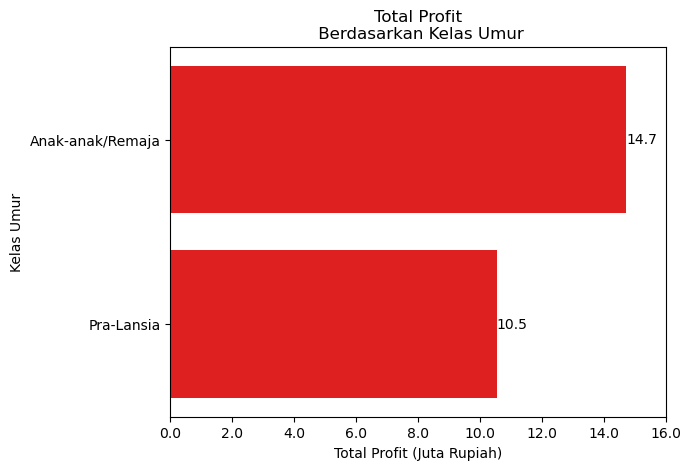

In [94]:
ax=plt.subplot()
pralansia_remaja_df = df.query("ageClass == 'Pra-Lansia' or ageClass == 'Anak-anak/Remaja'").copy()
pralansia_remaja_df['ageClass'] = pralansia_remaja_df['ageClass'].cat.remove_unused_categories()

bar_plot = sns.barplot(data=pralansia_remaja_df, y='ageClass', x='payAmount',estimator='sum', errorbar=None, ax=ax, color='red')
ax.set_xlabel('Total Profit (Juta Rupiah)')
ax.set_ylabel('Kelas Umur')
ax.set_title("Total Profit\n Berdasarkan Kelas Umur")

# Convert x-ticks to millions
x_ticks = ax.get_xticks()
x_labels = [f'{x/1000000:.1f}' for x in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)


# Annotate bars for second plot
for i, bar in enumerate(bar_plot.patches):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
               f'{width/1000000:.1f}', 
               va='center', ha='left')


Dari grafik di atas dapat dilihat bahwa kelas umur **Anak-anak/Remaja berkontribusi lebih besar untuk profit dibanding Pra-Laansia, meskipun proporsi penggunaan layanan Transjakarta-nya kurang lebih serupa**. Sebagaimana juga sudah dilihat sebelumnya **Anak-Anak/Remaja lebih banyak menggunakan Royaltrans,** sedangkan **Pra-Lansia lebih banyak menggunakan Mikrotrans yang tidak berbayar**.

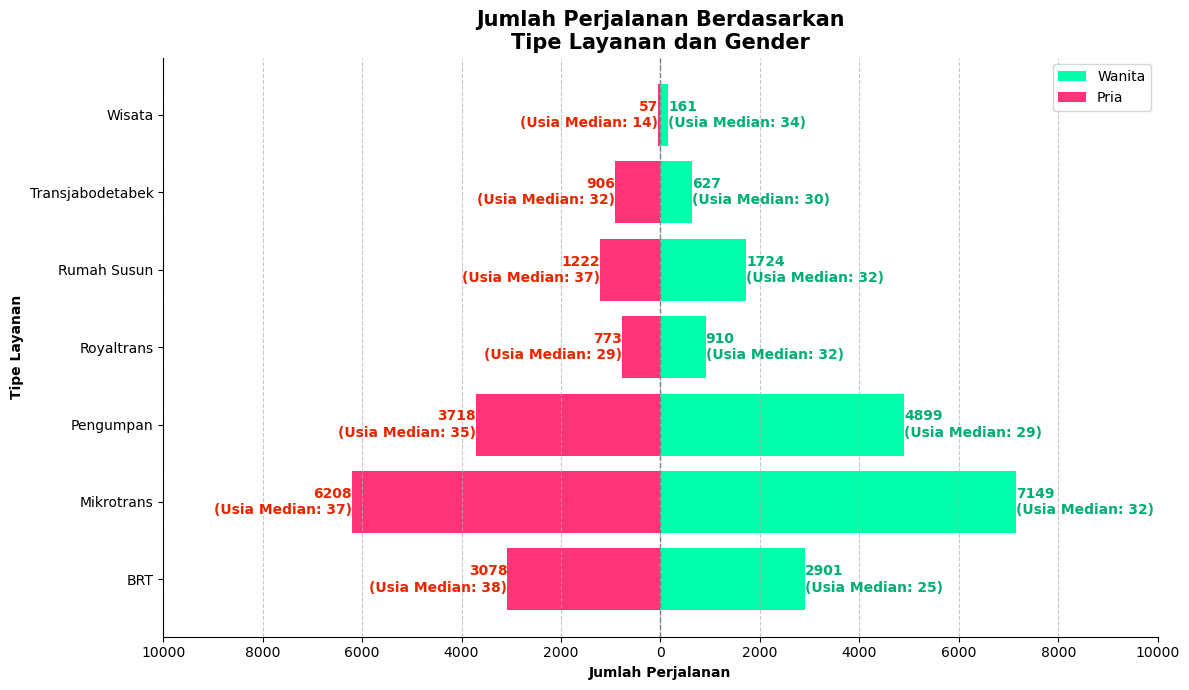

In [95]:
# Calculate median ages
age_ridetype_gender_median = df.pivot_table(
    index='rideType', 
    values='age', 
    columns='payCardSex', 
    aggfunc='median', 
    observed=False
)

# Create the crosstab
ridetype_gender_rides = pd.crosstab(df['rideType'], df['payCardSex'])

# Flip male counts to negative
ridetype_gender_rides['Pria'] = ridetype_gender_rides['Pria'] * -1

# Create the plot with improved styling
plt.figure(figsize=(12, 7))

# Create horizontal bars
plt.barh(ridetype_gender_rides.index, ridetype_gender_rides['Wanita'], color='#00ffaa', label='Wanita')
plt.barh(ridetype_gender_rides.index, ridetype_gender_rides['Pria'], color='#FF3377', label='Pria')

# Customize the plot
plt.xlabel('Jumlah Perjalanan', fontweight='bold')
plt.ylabel('Tipe Layanan', fontweight='bold')
plt.title('Jumlah Perjalanan Berdasarkan\nTipe Layanan dan Gender', fontsize=15, fontweight='bold')
plt.legend(frameon=True, loc='best')

# Adjust x-axis to be symmetrical
max_val = max(abs(ridetype_gender_rides['Pria'].max()), abs(ridetype_gender_rides['Wanita'].max()))
plt.xlim(-max_val * 1.25, max_val * 1.25)

# Add a vertical line at zero
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize x-ticks to show absolute values
xticks = plt.gca().get_xticks()

plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels([int(abs(x)) for x in xticks])

# Add value labels with median ages
for i, (male, female) in enumerate(zip(ridetype_gender_rides['Pria'], ridetype_gender_rides['Wanita'])):
    # Male (Pria) labels
    plt.text(male, i, f'{abs(male)}\n(Usia Median: {age_ridetype_gender_median.loc[ridetype_gender_rides.index[i], "Pria"]:.0f})', 
             va='center', ha='right', fontweight='bold', color='#E62600')
    
    # Female (Wanita) labels
    plt.text(female, i, f'{female}\n(Usia Median: {age_ridetype_gender_median.loc[ridetype_gender_rides.index[i], "Wanita"]:.0f})', 
             va='center', ha='left', fontweight='bold', color='#00AD73')

# Improve grid and layout
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### **Insights**
- Kelompok penumpang wanita cenderung memiliki proporsi lebih banyak dari pria untuk mayoritas kelompok layanan.
#### **Proporsi Pengguna Layanan Transjabodetabek**
- **Proporsi pengguna pria lebih besar dari wanita untuk kelompok layanan Transjabodetabek**

- **Kemungkinan Penyebab**:
  - **Jarak Tempuh dan Tujuan Perjalanan**: Pria sering kali lebih bersedia menempuh perjalanan panjang dibandingkan wanita, terutama jika tidak ada alternatif transportasi pribadi yang ekonomis. Berdasarkan [Statistik Komuter Jabodetabek Hasil Survei Komuter Jabodetabek 2023](https://www.bps.go.id/id/publication/2024/03/28/33b6bef825944e576e7ea3ba/statistik-komuter-jabodetabek-hasil-survei-komuter-jabodetabek-2023.html), persentase komuter laki-laki dan perempuan di Jabodetabek adalah sekitar 67%.

#### **Proporsi Pengguna Layanan Wisata**
- **Persentase pengguna perempuan adalah sekitar 74% untuk layanan Wisata**

- **Median umur pengguna laki-laki sangat muda (14 tahun) dibanding pengguna perempuan (34 tahun)**

- **Kemungkinan Penyebab**:

  - **Libur Lebaran**: Mungkin banyak anak-anak/remaja yang berwisata bersama Ibunya ketika libur lebaran.

---


### **Rekomendasi**
  - Mengingat proporsi penumpang wanita yang lebih tinggi, penting untuk meningkatkan aspek kenyamanan dan keamanan, terutama di halte-halte yang cenderung sepi dan jam malam.

  - Layanan TJ Wisata dapat menjalin kemitraan dengan penyedia layanan lain, seperti tempat wisata, restoran, dan toko, untuk menawarkan promosi yang saling menguntungkan, demi mengurangi jumlah penggunaan kendaraan pribadi saat liburan.

  - Mengingat bahwa pria cenderung bersedia menempuh perjalanan jauh, Transjabodetabek perlu melakukan analisis terhadap kenyamanan fasilitas bis transjabodetabek kelompok ini untuk menjaga kepercayaan mereka.


## Analisis Pola Perjalanan Pengguna Transjakarta
***

## Analisis Frekuensi Perjalanan Penumpang

In [96]:
customer_data_by_day = df.groupby(['tapInDate', 'payCardID'])[['transID', 'age', 'ageClass', 'payCardSex', 'ride_duration', 'payAmount', 'dayName', 'weekEnd']]\
                        .agg({'transID':'size', 
                            'age':pd.Series.mode,
                            'ageClass':pd.Series.mode,
                            'payCardSex':pd.Series.mode,
                            'ride_duration':'sum',
                            'payAmount':'sum',
                            'dayName':pd.Series.mode,
                            'weekEnd':pd.Series.mode})\
                        .rename(columns={'transID':'freq'})\
                        .reset_index()

customer_data_by_day

,tapInDate,payCardID,freq,age,ageClass,payCardSex,ride_duration,payAmount,dayName,weekEnd
0,2023-04-01,213107623841273,1,59,Pra-Lansia,Pria,1.888333,3500.0,Sabtu,Ya
1,2023-04-01,213129238120604,1,34,Dewasa,Wanita,1.173889,3500.0,Sabtu,Ya
2,2023-04-01,213198923840248,1,46,Pra-Lansia,Pria,1.936389,3500.0,Sabtu,Ya
3,2023-04-01,3508642829144211,1,47,Pra-Lansia,Pria,0.886389,0.0,Sabtu,Ya
4,2023-04-01,3567863915368369,1,35,Dewasa,Wanita,1.650556,3500.0,Sabtu,Ya
...,...,...,...,...,...,...,...,...,...,...
19064,2023-04-30,676190181542,1,31,Dewasa,Wanita,0.303889,3500.0,Minggu,Ya
19065,2023-04-30,676194898042,1,17,Anak-anak/Remaja,Wanita,1.535278,20000.0,Minggu,Ya
19066,2023-04-30,676238149170,1,26,Dewasa,Wanita,0.294444,0.0,Minggu,Ya
19067,2023-04-30,676316443321,1,48,Pra-Lansia,Wanita,1.850278,0.0,Minggu,Ya


In [97]:
customer_data_by_month = customer_data_by_day.groupby(['payCardID'])[['freq', 'age', 'ageClass', 'payCardSex', 'ride_duration', 'payAmount']]\
                        .agg({'freq':'sum', 
                            'age':pd.Series.mode,
                            'ageClass':pd.Series.mode,
                            'payCardSex':pd.Series.mode,
                            'ride_duration':'sum',
                            'payAmount':'sum'})\
                        .reset_index()


customer_data_by_month

,payCardID,freq,age,ageClass,payCardSex,ride_duration,payAmount
0,180000271117261,4,29,Dewasa,Pria,5.324722,0.0
1,180000876162530,39,50,Pra-Lansia,Pria,38.532222,136500.0
2,180001710094731,4,42,Dewasa,Wanita,5.248889,10500.0
3,180001837393123,14,29,Dewasa,Wanita,19.248333,49000.0
4,180002075456838,3,17,Anak-anak/Remaja,Wanita,3.725556,10500.0
...,...,...,...,...,...,...,...
1898,676346336529,4,27,Dewasa,Wanita,5.616389,43500.0
1899,676367323901,38,12,Anak-anak/Remaja,Wanita,40.142222,133000.0
1900,676368577380,37,41,Dewasa,Wanita,40.308333,0.0
1901,676371995694,14,36,Dewasa,Wanita,19.365833,0.0


In [98]:
customer_count_by_ageclass_dayname = customer_data_by_day.pivot_table(index='dayName', 
                                                                      columns='ageClass', 
                                                                      values='freq', 
                                                                      observed=False,
                                                                      aggfunc='sum')
display(customer_count_by_ageclass_dayname)

customer_count_by_ageclass_dayname = customer_count_by_ageclass_dayname\
                                    .reset_index()\
                                    .melt(id_vars=["dayName"], var_name="ageClass", value_name="customerCount") # Ubah ke long format

display(customer_count_by_ageclass_dayname)

ageClass,Anak-anak/Remaja,Dewasa,Pra-Lansia,Lansia
dayName,,,,
Senin,861,4287,1010,67
Selasa,859,4269,1013,74
Rabu,854,4253,1029,71
Kamis,863,4247,1021,72
Jumat,868,4304,1019,72
Sabtu,235,1065,277,22
Minggu,235,1107,251,28


,dayName,ageClass,customerCount
0,Senin,Anak-anak/Remaja,861
1,Selasa,Anak-anak/Remaja,859
2,Rabu,Anak-anak/Remaja,854
3,Kamis,Anak-anak/Remaja,863
4,Jumat,Anak-anak/Remaja,868
5,Sabtu,Anak-anak/Remaja,235
6,Minggu,Anak-anak/Remaja,235
7,Senin,Dewasa,4287
8,Selasa,Dewasa,4269
9,Rabu,Dewasa,4253


In [99]:
customer_count_by_ageclass_dayname['customerCount'].sum()

34333

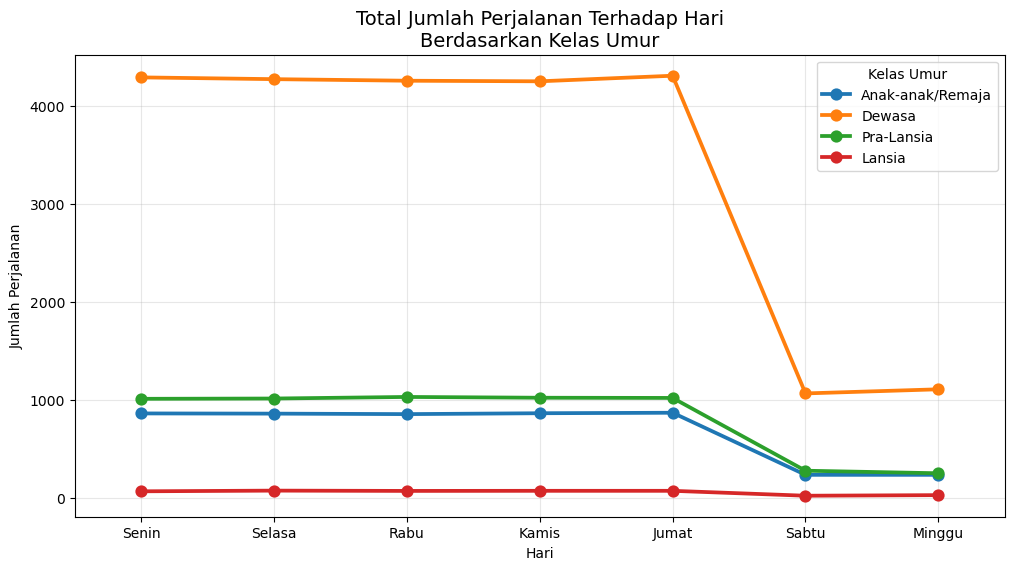

In [100]:
plt.figure(figsize=(12, 6))

sns.pointplot(data=customer_count_by_ageclass_dayname,
              x='dayName',
              y='customerCount',
              estimator='sum',
              hue='ageClass')


plt.xlabel("Hari")
plt.ylabel("Jumlah Perjalanan")
plt.title("Total Jumlah Perjalanan Terhadap Hari\nBerdasarkan Kelas Umur",fontsize=14)
plt.legend(title="Kelas Umur")
plt.grid(True, alpha=0.3)
plt.show()

In [101]:
print(f"Umumnya penumpang menggunakan layanan TJ sebanyak {int(customer_data_by_day['freq'].median())} kali dalam sehari.")

Umumnya penumpang menggunakan layanan TJ sebanyak 2 kali dalam sehari.


Menurut data dan hasil sebelumnya, **dapat dilihat mayoritas pengguna Transjakarta berasal dari usia dewasa dan menggunakan layanan TJ sekitar dua kali dalam sehari**. Jika diasumsikan sebagian besar pengguna TJ adalah  **working** *adult* (Dewasa dan Pra-Lansia) atau *pelajar* anak-anak/remaja, hal ini bisa disebabkan karena pola perjalanan pulang-pergi dari tempat tinggal ke tempat kerja/sekolah.

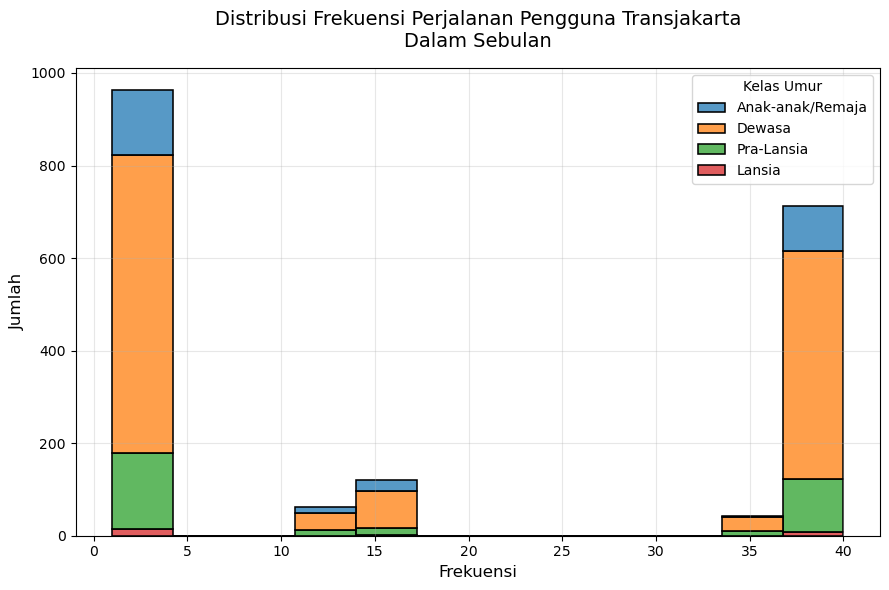

In [102]:
plt.figure(figsize=(9, 6))

sns.histplot(
    data=customer_data_by_month.rename(columns={'ageClass':'Kelas Umur'}), 
    x='freq', 
    hue='Kelas Umur',
    multiple="stack",
    linewidth=1.15
)
plt.title('Distribusi Frekuensi Perjalanan Pengguna Transjakarta\nDalam Sebulan', fontsize=14, pad=15)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

**Jika diasumsikan bahwa sebagian besar orang menggunakan Transjakarta untuk perjalanan pulang-pergi ke tempat kerja/sekolah selama 5 hari kerja per minggu, maka frekuensi perjalanan bulanan mereka seharusnya lebih padat pada ~40+ perjalanan per bulan**. Namun, dalam grafik ini terlihat bahwa ada konsentrasi lebih besar pada kategori frekuensi rendah (di bawah 10 perjalanan per bulan), yang tidak sesuai dengan asumsi awal bahwa pengguna dewasa mendominasi jumlah perjalanan untuk keperluan kerja/sekolah.

Untuk melihat alasannya, akan dilakukan analisa lebih lanjut di bawah: 

In [103]:
customer_data_by_month.query("freq < 10")

,payCardID,freq,age,ageClass,payCardSex,ride_duration,payAmount
0,180000271117261,4,29,Dewasa,Pria,5.324722,0.0
2,180001710094731,4,42,Dewasa,Wanita,5.248889,10500.0
4,180002075456838,3,17,Anak-anak/Remaja,Wanita,3.725556,10500.0
5,180004245990597,4,39,Dewasa,Wanita,5.378611,3500.0
8,180005977764266,4,22,Dewasa,Wanita,5.493056,3500.0
...,...,...,...,...,...,...,...
1893,676316443321,4,48,Pra-Lansia,Wanita,5.855278,0.0
1895,676323397635,3,46,Pra-Lansia,Pria,3.264722,3500.0
1896,676327742745,1,31,Dewasa,Pria,0.768333,0.0
1897,676340574497,4,38,Dewasa,Wanita,4.685556,3500.0


In [104]:
## Filter customer_data_by_day untuk mencari user yang pergi kurang dari 10 kali dalam sebulan
customer_data_by_day.groupby('payCardID').filter(lambda group: group['freq'].sum() < 10)

,tapInDate,payCardID,freq,age,ageClass,payCardSex,ride_duration,payAmount,dayName,weekEnd
0,2023-04-01,213107623841273,1,59,Pra-Lansia,Pria,1.888333,3500.0,Sabtu,Ya
1,2023-04-01,213129238120604,1,34,Dewasa,Wanita,1.173889,3500.0,Sabtu,Ya
2,2023-04-01,213198923840248,1,46,Pra-Lansia,Pria,1.936389,3500.0,Sabtu,Ya
3,2023-04-01,3508642829144211,1,47,Pra-Lansia,Pria,0.886389,0.0,Sabtu,Ya
4,2023-04-01,3567863915368369,1,35,Dewasa,Wanita,1.650556,3500.0,Sabtu,Ya
...,...,...,...,...,...,...,...,...,...,...
19064,2023-04-30,676190181542,1,31,Dewasa,Wanita,0.303889,3500.0,Minggu,Ya
19065,2023-04-30,676194898042,1,17,Anak-anak/Remaja,Wanita,1.535278,20000.0,Minggu,Ya
19066,2023-04-30,676238149170,1,26,Dewasa,Wanita,0.294444,0.0,Minggu,Ya
19067,2023-04-30,676316443321,1,48,Pra-Lansia,Wanita,1.850278,0.0,Minggu,Ya


In [105]:
customer_data_by_day.groupby('payCardID').filter(lambda group: group['freq'].sum() < 10)['dayName'].value_counts()

dayName
Minggu    1269
Sabtu     1242
Jumat       45
Senin       34
Selasa      33
Rabu        33
Kamis       29
Name: count, dtype: int64

**Maka dapat dilihat bahwa sebagian besar penumpang yang melakukan perjalanan kurang dari 10 kali per bulan cenderung bepergian pada akhir pekan.** Hal ini menunjukkan adanya kelompok pengguna "akhir pekan" (*weekend users*) yang berbeda dengan kelompok pengguna rutin yang melakukan perjalanan harian dengan TJ pada hari biasa.

Untuk mengakomodasi temuan ini dan memperdalam analisis, akan ditambah variabel baru bernama `weekEnd_user`. Variabel ini akan menjadi indikator biner yang menunjukkan apakah seorang pengguna lebih sering bepergian pada akhir pekan dibandingkan hari kerja.

In [106]:
customer_data_by_day.groupby('payCardID').filter(lambda group: group['dayName'].mode()[0] in({'Sabtu', 'Minggu'}))

,tapInDate,payCardID,freq,age,ageClass,payCardSex,ride_duration,payAmount,dayName,weekEnd
0,2023-04-01,213107623841273,1,59,Pra-Lansia,Pria,1.888333,3500.0,Sabtu,Ya
1,2023-04-01,213129238120604,1,34,Dewasa,Wanita,1.173889,3500.0,Sabtu,Ya
2,2023-04-01,213198923840248,1,46,Pra-Lansia,Pria,1.936389,3500.0,Sabtu,Ya
3,2023-04-01,3508642829144211,1,47,Pra-Lansia,Pria,0.886389,0.0,Sabtu,Ya
4,2023-04-01,3567863915368369,1,35,Dewasa,Wanita,1.650556,3500.0,Sabtu,Ya
...,...,...,...,...,...,...,...,...,...,...
19064,2023-04-30,676190181542,1,31,Dewasa,Wanita,0.303889,3500.0,Minggu,Ya
19065,2023-04-30,676194898042,1,17,Anak-anak/Remaja,Wanita,1.535278,20000.0,Minggu,Ya
19066,2023-04-30,676238149170,1,26,Dewasa,Wanita,0.294444,0.0,Minggu,Ya
19067,2023-04-30,676316443321,1,48,Pra-Lansia,Wanita,1.850278,0.0,Minggu,Ya


In [107]:
customer_data_by_day_weekend_passengers = customer_data_by_day.groupby('payCardID').filter(lambda group: group['dayName'].mode()[0] in({'Sabtu', 'Minggu'}))
customer_data_by_day_weekday_passengers = customer_data_by_day.groupby('payCardID').filter(lambda group: group['dayName'].mode()[0] not in({'Sabtu', 'Minggu'}))

customer_data_by_day_weekend_passengers['weekEnd_user'] = 'Ya'
customer_data_by_day_weekday_passengers['weekEnd_user'] = 'Bukan'

customer_data_by_day = pd.concat([customer_data_by_day_weekend_passengers, customer_data_by_day_weekday_passengers])
customer_data_by_day

,tapInDate,payCardID,freq,age,ageClass,payCardSex,ride_duration,payAmount,dayName,weekEnd,weekEnd_user
0,2023-04-01,213107623841273,1,59,Pra-Lansia,Pria,1.888333,3500.0,Sabtu,Ya,Ya
1,2023-04-01,213129238120604,1,34,Dewasa,Wanita,1.173889,3500.0,Sabtu,Ya,Ya
2,2023-04-01,213198923840248,1,46,Pra-Lansia,Pria,1.936389,3500.0,Sabtu,Ya,Ya
3,2023-04-01,3508642829144211,1,47,Pra-Lansia,Pria,0.886389,0.0,Sabtu,Ya,Ya
4,2023-04-01,3567863915368369,1,35,Dewasa,Wanita,1.650556,3500.0,Sabtu,Ya,Ya
...,...,...,...,...,...,...,...,...,...,...,...
18426,2023-04-28,676274145736,2,28,Dewasa,Pria,1.301111,0.0,Jumat,Bukan,Bukan
18427,2023-04-28,676283044227,2,39,Dewasa,Pria,1.919722,40000.0,Jumat,Bukan,Bukan
18428,2023-04-28,676293109036,2,40,Dewasa,Pria,2.402778,7000.0,Jumat,Bukan,Bukan
18429,2023-04-28,676367323901,2,12,Anak-anak/Remaja,Wanita,2.135278,7000.0,Jumat,Bukan,Bukan


In [108]:
## To map weekend users in the main data
weekend_user_map = customer_data_by_day[['payCardID', 'weekEnd_user']].drop_duplicates().set_index('payCardID')['weekEnd_user'].to_dict()
df['weekEnd_user'] = df['payCardID'].map(weekend_user_map)
df['weekEnd_user']

0        Bukan
1        Bukan
2        Bukan
3        Bukan
4        Bukan
         ...  
37895    Bukan
37896    Bukan
37897    Bukan
37898       Ya
37899    Bukan
Name: weekEnd_user, Length: 34333, dtype: object

In [109]:
customer_data_by_month = customer_data_by_day.groupby(['payCardID'])[['freq', 'age', 'ageClass', 'payCardSex', 'ride_duration', 'payAmount', 'weekEnd_user']]\
                        .agg({'freq':'sum', 
                            'age':pd.Series.mode,
                            'ageClass':pd.Series.mode,
                            'payCardSex':pd.Series.mode,
                            'ride_duration':'sum',
                            'payAmount':'sum',
                            'weekEnd_user':pd.Series.mode})\
                        .reset_index()


customer_data_by_month

,payCardID,freq,age,ageClass,payCardSex,ride_duration,payAmount,weekEnd_user
0,180000271117261,4,29,Dewasa,Pria,5.324722,0.0,Ya
1,180000876162530,39,50,Pra-Lansia,Pria,38.532222,136500.0,Bukan
2,180001710094731,4,42,Dewasa,Wanita,5.248889,10500.0,Ya
3,180001837393123,14,29,Dewasa,Wanita,19.248333,49000.0,Bukan
4,180002075456838,3,17,Anak-anak/Remaja,Wanita,3.725556,10500.0,Ya
...,...,...,...,...,...,...,...,...
1898,676346336529,4,27,Dewasa,Wanita,5.616389,43500.0,Ya
1899,676367323901,38,12,Anak-anak/Remaja,Wanita,40.142222,133000.0,Bukan
1900,676368577380,37,41,Dewasa,Wanita,40.308333,0.0,Bukan
1901,676371995694,14,36,Dewasa,Wanita,19.365833,0.0,Bukan


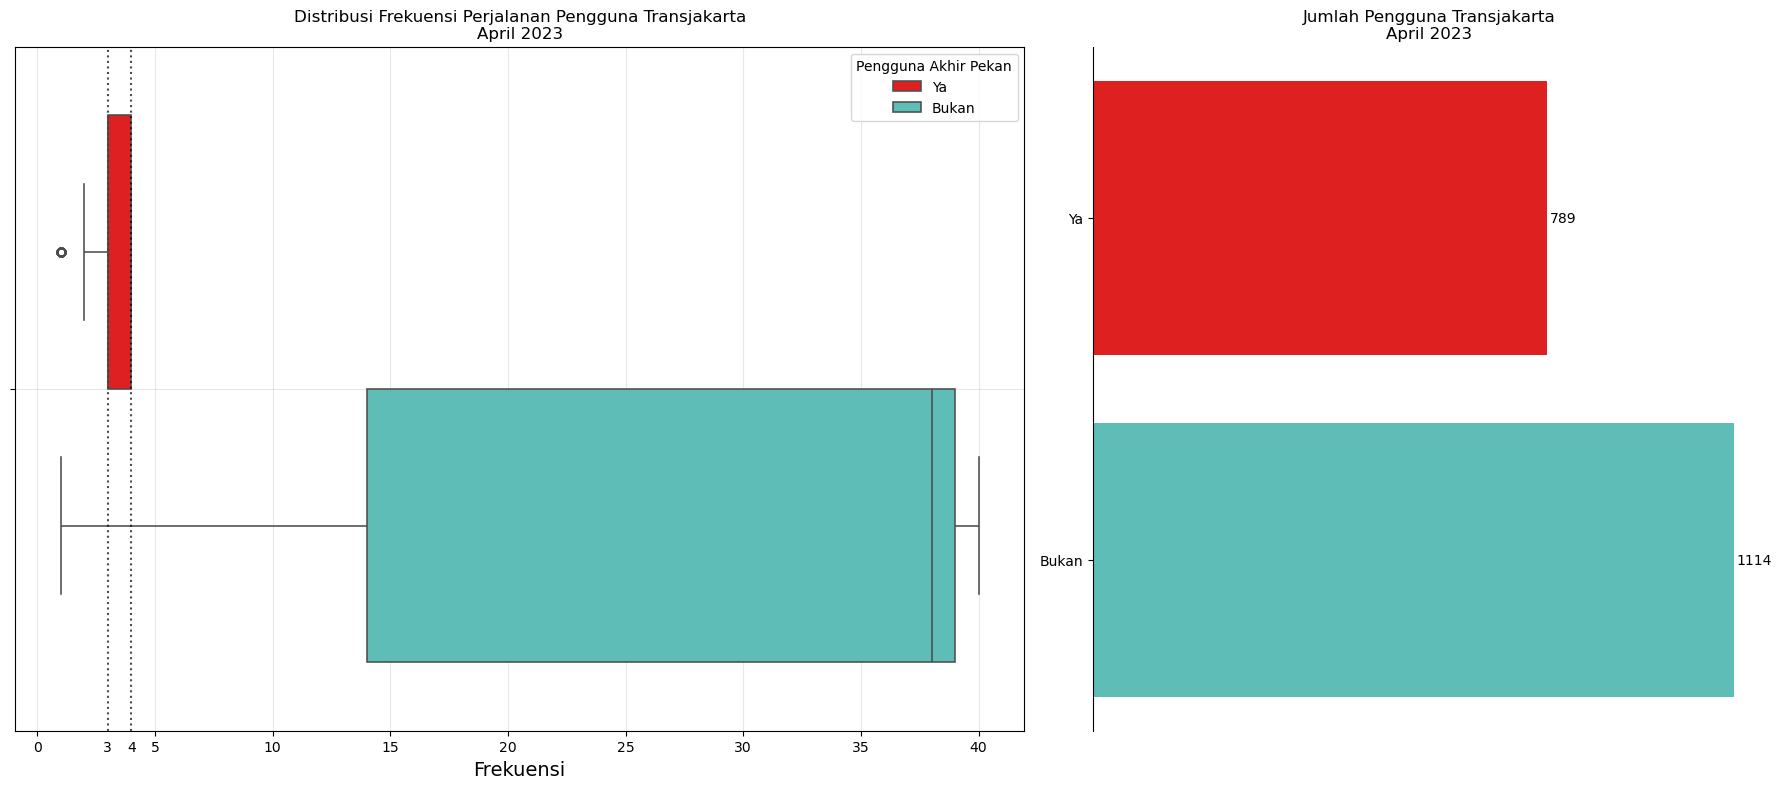

In [110]:
fig, ax = plt.subplots(1,2, figsize= (18,8), width_ratios=(1.5,1))

sns.boxplot(
    data=customer_data_by_month.rename(columns={'ageClass':'Kelas Umur', 'weekEnd_user':'Pengguna Akhir Pekan'}),
    hue='Pengguna Akhir Pekan',
    x='freq', 
    linewidth=1.15,
    palette={'Ya':'red', 'Bukan':'#4ECDC4'},
    ax=ax[0]
)
ax[0].set_title('Distribusi Frekuensi Perjalanan Pengguna Transjakarta\nApril 2023')
ax[0].set_xlabel('Frekuensi', fontsize=14)

# Add dotted vertical lines at x=3 and x=4
ax[0].axvline(x=3, color='black', linestyle=':', alpha=0.7)
ax[0].axvline(x=4, color='black', linestyle=':', alpha=0.7)

# Annotate the vertical lines exactly on x-axis
ax[0].text(3, 0.513, '3', 
         horizontalalignment='center', 
         verticalalignment='top', 
         color='black')
ax[0].text(4, 0.513, '4', 
         horizontalalignment='center', 
         verticalalignment='top', 
         color='black')

# Add grid for better readability
ax[0].grid(True, alpha=0.3)
# Countplot with bar annotations for both groups
sns.countplot(data=customer_data_by_month, y='weekEnd_user', hue='weekEnd_user', ax=ax[1], palette={'Ya':'red', 'Bukan':'#4ECDC4'})

# Annotate counts for all bars
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='edge', padding=2, fmt='%d')

ax[1].set_title("Jumlah Pengguna Transjakarta\nApril 2023")
ax[1].set_xlabel("")  # Remove x-axis label
ax[1].set_xticks([])  # Remove x-axis ticks
ax[1].set_ylabel("")  # Remove y-axis label

# Remove top, bottom and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

plt.show()

In [111]:
customer_data_by_month.groupby('weekEnd_user')['freq'].skew()

weekEnd_user
Bukan   -0.929698
Ya      -1.072956
Name: freq, dtype: float64

### **Insights**
#### **Pengguna Akhir Pekan**
- Sebanyak **789 orang** tercatat menggunakan Transjakarta pada akhir pekan, meskipun frekuensinya jauh lebih kecil (**3-4 kali per bulan**) dibanding kelompok Pengguna Hari Biasa. Kelompok penumpang ini merupakan **41.46% dari total penumpang selama April 2023**.

- Dapat dilihat pula kelompok pengguna ini konsisten hanya menggunakan Transjakarta pada akhir pekan.
- **Kemungkinan Penyebab**:
  - **Kebutuhan Rekreasi**: Akhir pekan dimanfaatkan untuk perjalanan ke tempat wisata, pusat perbelanjaan, atau kegiatan sosial.
  - **Orang dari Luar Kota**: Akhir pekan dimanfaatkan orang dari luar kota untuk mengunjungi keluarga atau liburan di Jakarta.

#### **Pengguna Hari Kerja**
- Sebanyak **1.114 orang** menggunakan Transjakarta konsisten pada hari kerja.
- Rata-rata frekuensi pengguna hari kerja adalah sekitar **37 perjalanan per bulan**, sedikit lebih rendah dari ekspektasi (**~40+ perjalanan per bulan**).

- Data menunjukkan distribusi yang condong ke kiri (*left-skewed*), di mana banyak variasi frekuensi pada pengguna yang frekuensinya lebih rendah dari median.

- **Kemungkinan Penyebab**:
  - **Hybrid Work**: Setelah pandemi, masih ada perusahaan mengadopsi kebijakan *hybrid* atau *remote*, yang mengurangi kebutuhan perjalanan harian ke kantor.

  - **Bulan Puasa**: Dari 23 Maret hingga 21 April 2023, sebagian besar masyarakat Indonesia menjalankan ibadah puasa. Perubahan ini sering kali berdampak pada pengurangan aktivitas di luar rumah atau perubahan pola perjalanan.

---

### **Rekomendasi**
  - Identifikasi kepadatan rute-rute favorit pengguna akhir pekan untuk menentukan kebutuhan armada.

  - Lakukan survei tentang lebih mendalam untuk adaptasi rute dan jadwal bis dengan *trend hybrid working* yang akan berubah di masa depan dan juga pertimbangkan pula pola penggunaan selama bulan puasa.

  - Pertimbangkan untuk menyesuaikan jadwal layanan pada akhir pekan agar lebih sesuai dengan pola perjalanan pengguna.

## Perbandingan antara Akhir Pekan dan Non-Akhir Pekan

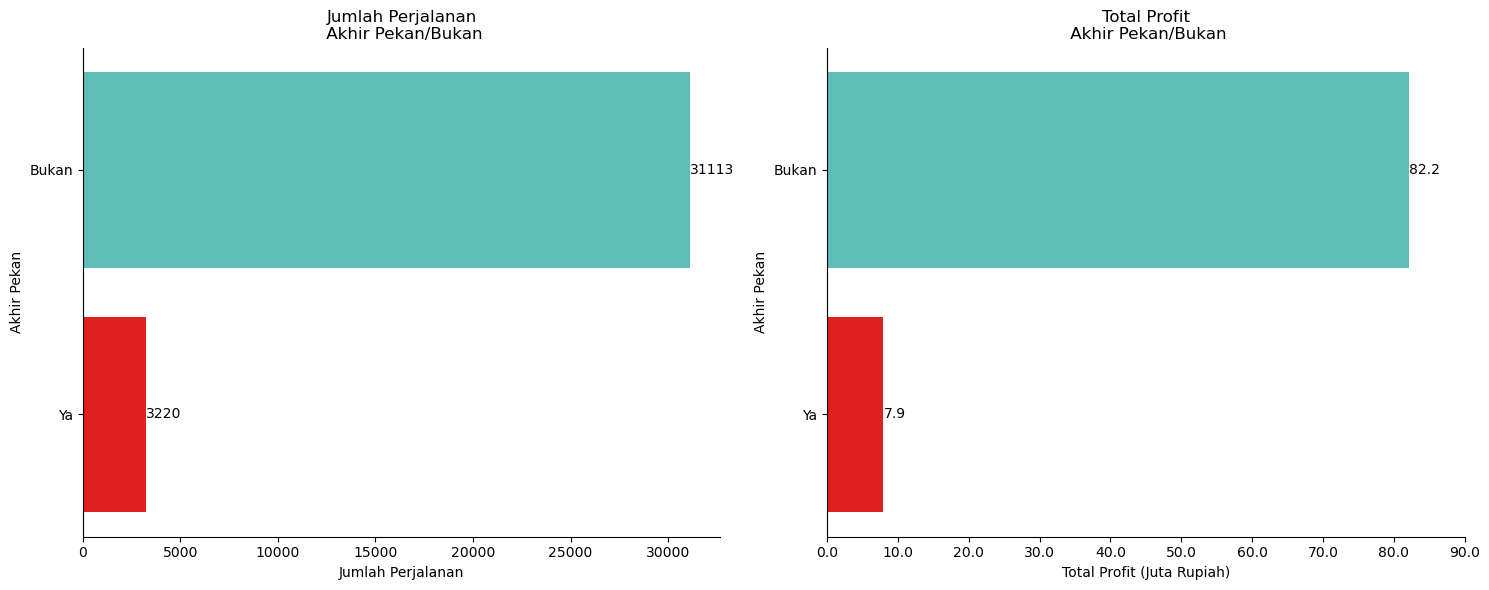

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

bar_plot = sns.barplot(data=df, y='weekEnd', x='payAmount', hue='weekEnd', palette={'Ya':'red', 'Bukan':'#4ECDC4'}, 
            estimator='sum', errorbar=None, ax=ax[1])
ax[1].set_xlabel('Total Profit (Juta Rupiah)')
ax[1].set_ylabel('Akhir Pekan')
ax[1].set_title("Total Profit\n Akhir Pekan/Bukan")
# Convert x-ticks to millions
x_ticks = ax[1].get_xticks()
x_labels = [f'{x/1000000:.1f}' for x in x_ticks]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)

# Annotate bars for first plot
for i, bar in enumerate(bar_plot.patches):
    width = bar.get_width()
    ax[1].text(width, bar.get_y() + bar.get_height()/2, 
               f'{width/1000000:.1f}', 
               va='center', ha='left')


count_plot = sns.countplot(data=df, y='weekEnd', hue='weekEnd', palette={'Ya':'red', 'Bukan':'#4ECDC4'}, ax=ax[0])
ax[0].set_xlabel('Jumlah Perjalanan')
ax[0].set_ylabel('Akhir Pekan')
ax[0].set_title("Jumlah Perjalanan\n Akhir Pekan/Bukan")

# Annotate bars for second plot
for i, bar in enumerate(count_plot.patches):
    width = bar.get_width()
    ax[0].text(width, bar.get_y() + bar.get_height()/2, 
               f'{width:.0f}', 
               va='center', ha='left')

# Remove top, bottom and right spines
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## **Insight**
- Meskipun sebelumnya sempat disebut bahwa pengguna akhir pekan merupakan 41,46% dari total pengguna, dapat dilihat kontribusi pada akhir bekan tidak signifikan baik dari segi jumlah perjalanan maupun total profit.

## **Rekomendasi**
- Pertimbangan pengurangan jumlah armada di akhir pekan untuk menghemat biaya operasi.

## Profil Perjalanan Bulan April

In [113]:
df['# of Rides'] = 1 # For simplifying count calculations

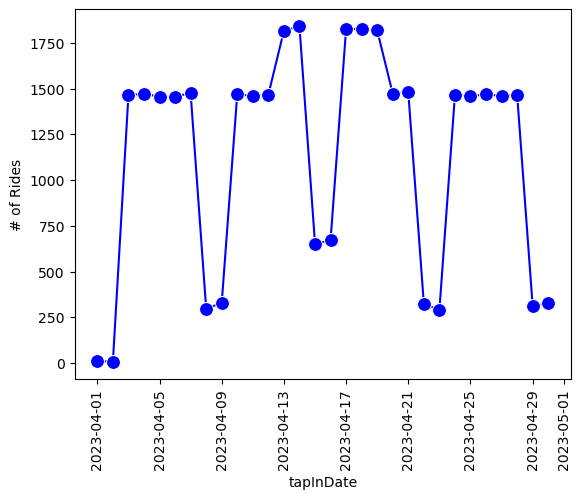

In [114]:
sns.lineplot(data=df, x='tapInDate', y='# of Rides', estimator='sum',marker='o', markersize=10, color='blue',errorbar=None)
plt.xticks(rotation=90)
plt.show()

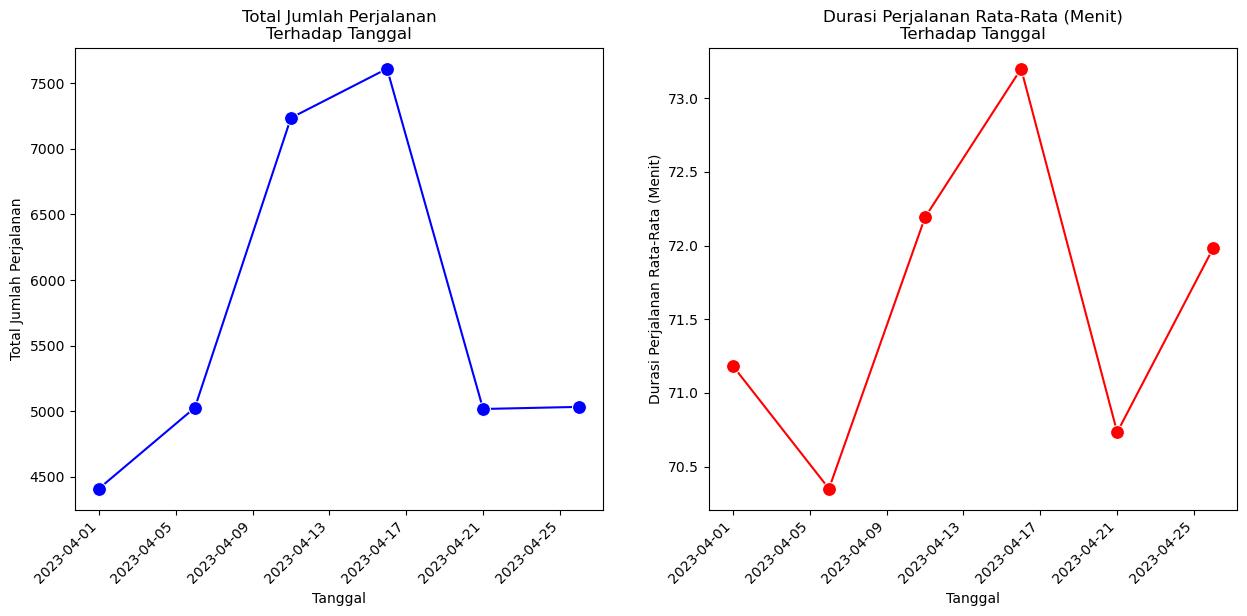

In [115]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(df.set_index('tapInTime')['# of Rides'].resample('5D').sum(),
             marker='o',
             markersize=10,
             color='blue',
             errorbar=None,
             ax=ax[0])
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(),rotation=45, ha='right')
ax[0].set_ylabel("Total Jumlah Perjalanan")
ax[0].set_xlabel("Tanggal")
ax[0].set_title("Total Jumlah Perjalanan\nTerhadap Tanggal")


sns.lineplot(df.set_index('tapInTime')['ride_duration'].resample('5D').median()*60,
             marker='o',
             markersize=10,
             color='red',
             errorbar=None,
             ax=ax[1])
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(),rotation=45, ha='right')
ax[1].set_ylabel("Durasi Perjalanan Rata-Rata (Menit)")
ax[1].set_xlabel("Tanggal")
ax[1].set_title("Durasi Perjalanan Rata-Rata (Menit)\nTerhadap Tanggal")

plt.show()


### **Insights**
#### **Total Jumlah Perjalanan Terhadap Tanggal**
- **Kenaikan Jumlah Penumpang Signifikan di Pertengahan Bulan**: Puncak jumlah perjalanan terdapat pada sekitar 17 April. 
- **Penurunan Jumlah Penumpang Signifikan Setelah 21 April**: Jumlah penumpang menurun drastis dan cenderung konstan hingga akhir bulan. 

- **Kemungkinan Penyebab**:
  - **Aktivitas belanja**: Banyak warga Jakarta melakukan persiapan Lebaran, termasuk belanja kebutuhan.

  - **Aktivitas kantor yang meningkat**: Banyak perusahaan mungkin memiliki tenggat waktu sebelum libur Lebaran, menyebabkan peningkatan mobilitas pekerja.

  - **Wisatawan dan pemudik yang datang**: Jakarta mungkin menerima kunjungan dari luar kota yang menggunakan Transjakarta untuk bepergian di dalam kota

  -  **Aktivitas Pasca-Lebaran**: Beberapa warga mungkin menggunakan waktu cuti bersama dari tanggal 19-25 April untuk aktivitas lain seperti mengunjungi kerabat di Jakarta dengan kendaraan pribadi.

#### **Durasi Perjalanan Rata-Rata Terhadap Tanggal**
- **Kenaikan Durasi Rata-Rata setelah 21 April**: Profil cenderung serupa dengan Total Jumlah Perjalanan Terhadap Tanggal, tetapi durasi perjalanan naik setelah 21 April. 

- **Kemungkinan Penyebab**:
  - **Meningkatnya arus lalu lintas saat libur**: Mungkin banyak warga yang lebih memilih menggunakan kendaraan pribadi saat liburan sehingga durasi perjalanan bis menjadi lebih lama.


### **Rekomendasi**
  - Tingkatkan jumlah armada dan frekuensi layanan sekitar 10 hari sebelum hari raya besar seperti Idul FItri
  
  - Lakukan evaluasi rute untuk mengurangi durasi perjalanan, terutama selama periode libur lama
---

## Analisis Profil Perjalanan Harian April 2023

In [116]:
pd.crosstab(df['tapInHour'], df['tapInTime'].dt.day)

tapInTime,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
tapInHour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,0,0,128,136,113,148,136,15,23,137,127,133,160,156,37,39,156,147,151,136,136,20,20,139,133,143,138,139,33,15
6,2,0,267,236,270,244,259,17,21,248,250,249,252,274,30,41,272,287,278,268,251,17,13,253,256,226,240,245,16,17
7,1,1,115,123,109,115,104,22,18,136,122,108,125,125,27,37,136,138,129,102,118,21,20,113,119,110,121,117,15,23
8,0,0,106,111,128,110,124,25,24,108,113,115,150,137,47,38,142,141,128,107,123,19,16,120,109,126,112,119,20,27
9,1,1,111,123,112,103,115,10,14,110,114,121,139,143,42,40,136,122,133,122,108,28,12,107,114,121,117,115,13,20
10,1,0,1,1,0,0,3,15,10,0,1,2,18,19,29,43,11,14,23,0,0,17,24,1,0,0,0,0,20,14
11,0,1,1,0,0,0,1,17,27,1,0,0,24,23,37,35,19,22,24,1,0,15,17,0,1,0,0,2,11,15
12,1,0,0,3,0,0,0,15,18,1,0,0,19,21,39,32,14,22,30,1,0,22,18,0,0,1,0,1,19,21
13,0,1,0,1,1,0,1,12,24,0,1,1,25,22,40,41,30,15,13,0,2,23,23,1,0,0,0,0,14,21


In [117]:
median_rides_per_tap_hour = pd.crosstab(df['tapInHour'], df['tapInTime'].dt.day).median(axis=1).round(0).astype('int').reset_index().rename(columns={0:'# of Rides'})
median_rides_per_tap_hour

,tapInHour,# of Rides
0,5,134
1,6,246
2,7,112
3,8,110
4,9,112
5,10,2
6,11,1
7,12,1
8,13,1
9,14,0


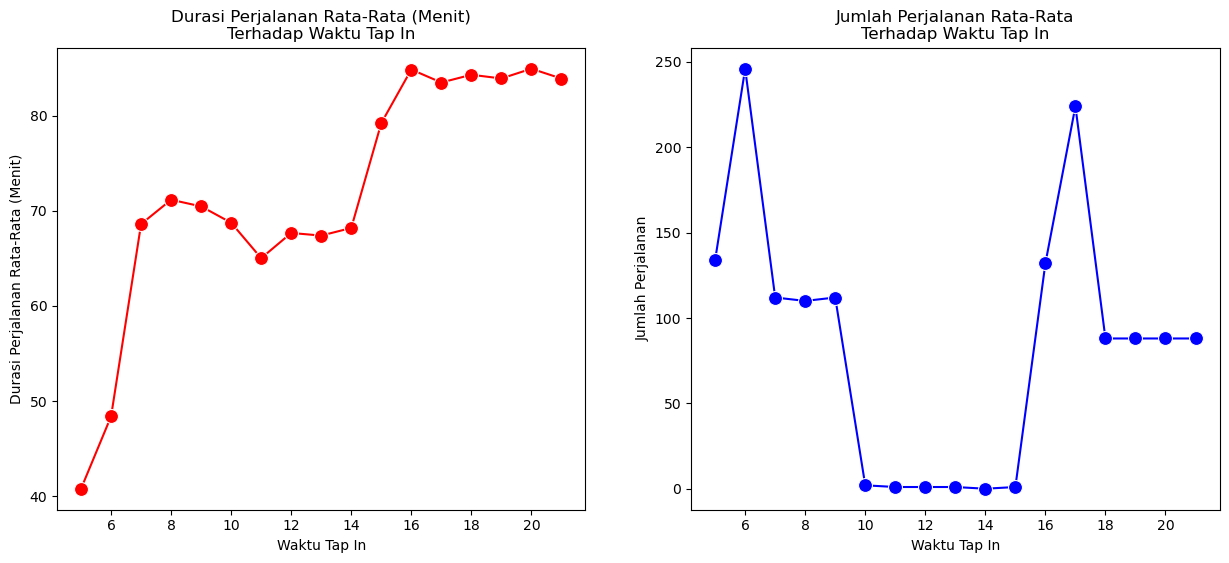

In [118]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.lineplot(data=df, x='tapInHour', y=df['ride_duration']*60, estimator='median',marker='o', markersize=10, color='red',errorbar=None, ax=ax[0])
ax[0].set_ylabel("Durasi Perjalanan Rata-Rata (Menit)")
ax[0].set_xlabel("Waktu Tap In")
ax[0].set_title("Durasi Perjalanan Rata-Rata (Menit)\nTerhadap Waktu Tap In")
sns.lineplot(data=median_rides_per_tap_hour, 
             x='tapInHour', 
             y='# of Rides', 
             estimator='median',
             marker='o', 
             markersize=10, 
             color='blue',
             errorbar=None, ax=ax[1])
ax[1].set_ylabel("Jumlah Perjalanan")
ax[1].set_xlabel("Waktu Tap In")
ax[1].set_title("Jumlah Perjalanan Rata-Rata\nTerhadap Waktu Tap In")

plt.show()


### **Insights**
- **Puncak Jumlah Penumpang Pada Pagi dan Malam**: Puncak jumlah perjalanan terdapat pada sekitar pukul 06.00 dan pukul 17.00. Ini adalah jam pulang/pergi kantor.

- **Penurunan Jumlah Penumpang di Jam Siang**: Jumlah penumpang menurun drastis dari pukul 09.00 ke pukul 10.00 dan cenderung konstan hingga 15.00

- **Durasi Perjalanan cenderung konstan setelah pukul 16.00**: Kemungkinan ada kemacetan pada jam ini, sebagaimana mayoritas hari pada April 2023 adalah hari puasa dan jam ini dekat dengan jam buka. 

- **Dapat dilihat juga bahwa jumlah perjalanan pada pukul 18.00 cenderung konstan, mengindikasikan kemungkinan adanya keterlambatan antara bis yang datang**. **Hal yang serupa juga terjadi pada pukul 07.00-09.00 pagi**, sebagaimana durasi perjalanan pada rentang tersebut juga cenderung konstan dengan jumlah perjalanan yang konstan.


### **Rekomendasi**
  - Pertimbangkan penyesuaian jadwal dan manajemen bis untuk mengurangi keterlambatan

  - Pertimbangkan penggunaan bus berkapasitas lebih besar pada jam dengan penumpang tinggi
  
  - Pertimbangkan pengurangan armada pada waktu dengan jumlah penumpang rendah
---

## Perbandingan Layanan Transjakarta
***

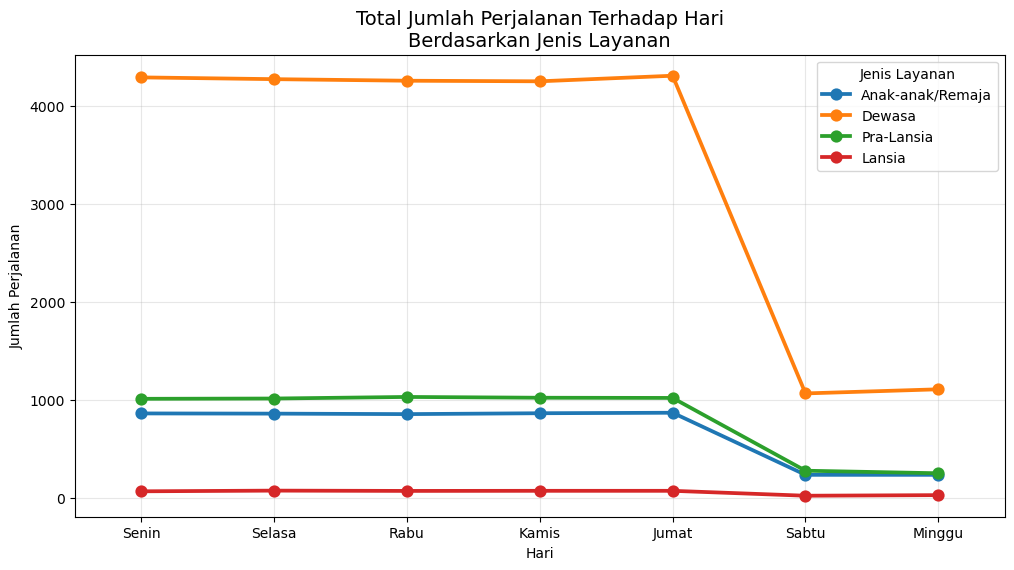

In [119]:
plt.figure(figsize=(12, 6))

sns.pointplot(data=df,
              x='dayName',
              y='# of Rides',
              estimator='sum',
              hue='ageClass')


plt.xlabel("Hari")
plt.ylabel("Jumlah Perjalanan")
plt.title("Total Jumlah Perjalanan Terhadap Hari\nBerdasarkan Jenis Layanan",fontsize=14)
plt.legend(title="Jenis Layanan")
plt.grid(True, alpha=0.3)
plt.show()

Dari grafik di atas dapat dilihat tidak ada jenis layanan yang lebih besar jumlah perjalanannya pada hari-hari tentu. Semuanya cenderung memiliki derajat yang sama pada seluruh hari.

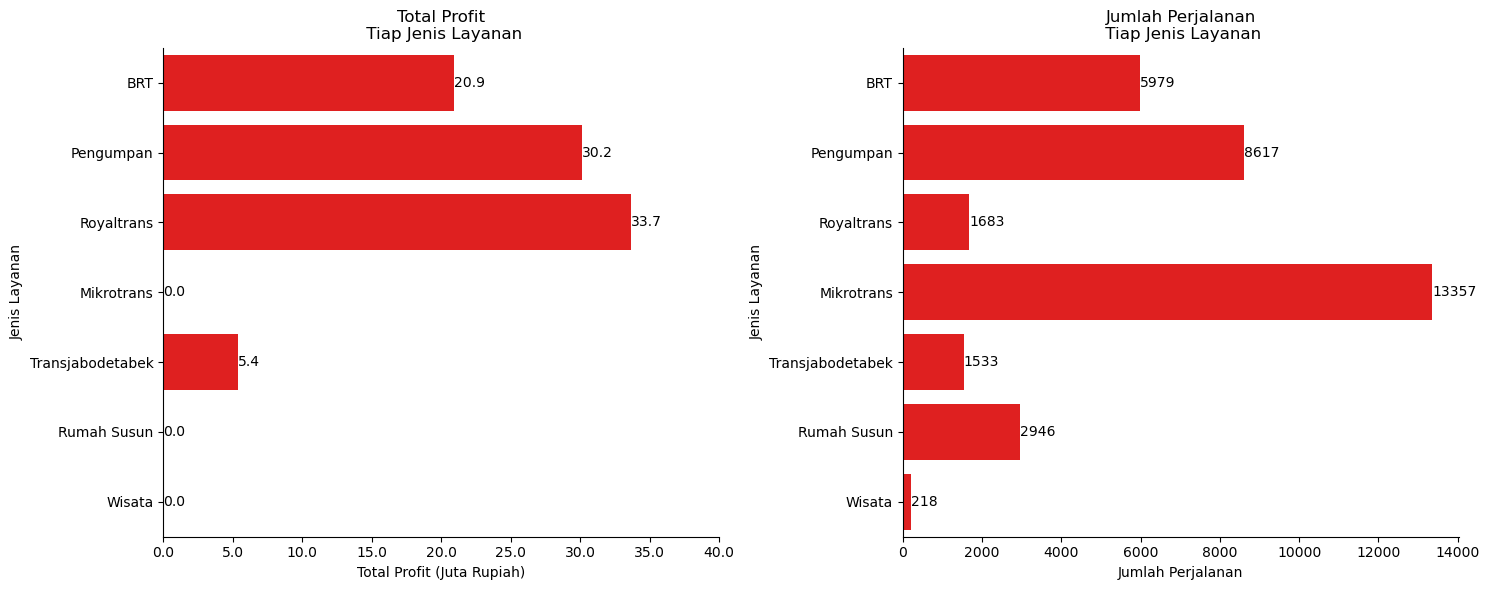

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

bar_plot = sns.barplot(data=df, y='rideType', x='payAmount', color='red', 
            estimator='sum', errorbar=None, ax=ax[0])
ax[0].set_xlabel('Total Profit (Juta Rupiah)')
ax[0].set_ylabel('Jenis Layanan')
ax[0].set_title("Total Profit\n Tiap Jenis Layanan")
# Convert x-ticks to millions
x_ticks = ax[0].get_xticks()
x_labels = [f'{x/1000000:.1f}' for x in x_ticks]
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_labels)

# Annotate bars for first plot
for i, bar in enumerate(bar_plot.patches):
    width = bar.get_width()
    ax[0].text(width, bar.get_y() + bar.get_height()/2, 
               f'{width/1000000:.1f}', 
               va='center', ha='left')


count_plot = sns.countplot(data=df, y='rideType', color='red', ax=ax[1])
ax[1].set_xlabel('Jumlah Perjalanan')
ax[1].set_ylabel('Jenis Layanan')
ax[1].set_title("Jumlah Perjalanan\n Tiap Jenis Layanan")

# Annotate bars for second plot
for i, bar in enumerate(count_plot.patches):
    width = bar.get_width()
    ax[1].text(width, bar.get_y() + bar.get_height()/2, 
               f'{width:.0f}', 
               va='center', ha='left')

# Remove top, bottom and right spines
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [121]:
total_profit = int(customer_data_by_day.groupby('payCardID')['payAmount'].sum().sum())
formatted_profit = f"{total_profit:,}".replace(",", ".")
print(f"Total Profit Operasi Transjakarta April 2023: Rp{formatted_profit}")

Total Profit Operasi Transjakarta April 2023: Rp90.111.500


In [122]:
print(f"Rata-rata penumpang mengeluarkan Rp.{int(np.round(df.groupby('payCardID')['payAmount'].sum().mean()/10)*10)} untuk naik Transjakarta dalam bulan April 2023.")

Rata-rata penumpang mengeluarkan Rp.47350 untuk naik Transjakarta dalam bulan April 2023.


### **Insights**
- **BRT (Bus Rapid Transit)** memiliki kontribusi besar terhadap jumlah perjalanan (5.979 perjalanan) dan memberikan profit sebesar 20,9 juta rupiah.

- **Pengumpan (Feeder)** adalah layanan dengan jumlah perjalanan yang cukup tinggi (8.617 perjalanan) dan menghasilkan profit sebesar 30,2 juta rupiah, yang hampir mendekati profit layanan Royaltrans.

- **Royaltrans** memberikan profit tertinggi (33,7 juta rupiah), tetapi jumlah perjalanan (1.683 perjalanan) jauh lebih sedikit dibandingkan BRT dan Pengumpan, menunjukkan bahwa layanan ini memang premium.

- **Mikrotrans** tidak menghasilkan profit sama sekali karena memang saat ini sedang gratis. Jumlah perjalanannya adalah yang tertinggi. Meskipun Mikrotrans saat ini gratis dan memiliki kapasitas lebih kecil dibandingkan BRT atau Pengumpan, Mikrotrans menjangkau area yang tidak terlayani oleh BRT atau rute feeder, terutama wilayah yang sulit diakses oleh bus besar. 

- **Rumah Susun** tidak menghasilkan profit sama sekali karena memang saat ini sedang gratis. Jumlah perjalanannya tidak signifikan.

- **Transjabodetabek** meskipun memiliki profit (5,4 juta rupiah), jumlah perjalanan (1.533) tidak signifikan jika dibandingkan BRT, Pengumpan, dan Royaltrans.


### **Rekomendasi**

- Tinjau penambahan armada BRT serta Pengumpan karena layanan ini memiliki kapasitas penumpang tinggi dan memberikan kontribusi signifikan pada profit. 

- Karena kapasitas Mikrotrans lebih kecil, tinjau penambahan frekuensi perjalanan di rute yang padat untuk memastikan penumpang dapat terangkut tanpa harus menunggu lama

- Lakukan kampanye untuk meningkatkan kesadaran masyarakat tentang keberadaan Royaltrans sebagai opsi transportasi yang nyaman dan lebih terjangkau dibandingkan kendaraan pribadi. Terutama di kawasan perkantoran, pusat bisnis, atau pemukiman menengah ke atas. Selain menambah profit, hal ini juga dapat mengurangi kemacetan di Jakarta, karena umumnya masyarakat menengah atas cenderung memilih menggunakan kendaraan pribadi.

# Kesimpulan
- Orang dewasa merupakan segmen terbesar pengguna Transjakarta. Dilanjutkan dengan Pra-Lansia, Anak-Anak, dan Lansia. Sangat sedikit pengguna Transjakarta yang lansia.

- Pengguna dewasa juga merupakan segmen terbesar dari seluruh kelompok layanan Transjakarta.

- Proporsi pengguna wanita lebih besar dari pengguna pria, meskipun tidak terlalu besar. Kontribusinya terhadap profit juga lebih besar dibanding penumpang pria. 

- Proporsi pengguna wanita cenderung  lebih besar di kebanyakan layanan-layanan Transjakarta dengan beberapa pengecualian, seperti Transjabodetabek yang mayoritasnya adalah penumpang pria. 

- Terdapat kelompok "Pengguna Akhir Pekan" dimana para pengguna ini merupakan 41.46% dari total penumpang selama April 2023 dan konsisten menggunakan Transjakarta selama akhir pekan.

- Meskipun demikian, kontribusi kelompok ini tidak signifikan sebagaimana dilihat dari jumlah perjalanan dan profit pada akhir pekan jauh lebih sedikit dibanding pada hari kerja.

- Jumlah armada dapat dikurangi saat akhir pekan untuk mengurangi biaya operasional

- Terdapat kenaikan jumlah penumpang yang signifikan pada sekitar H-7 Hari Raya Idul Fitri

- Puncak Jumlah Penumpang adalah jam pergi dan pulang kerja. Dapat dipertimbangkan penggunaan berkapasitas besar dan alokasinya dari rute-rute yang sepi pada jam dengan penumpang tinggi.

- Peningkatan layanan dapat difokuskan ke segmen dewasa dan Anak-Anak/Remaja. Peningkatan layanan juga dapat difokuskan ke BRT dan Pengumpan karena kapasitas penumpang kedua layanan ini yang tinggi dan memberi kontribusi yang signifikan pada profit.

In [123]:
df.to_csv("transjakarta_clean.csv")